In [1]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

## Wer wählt die Afd?- Geostatistische Erkundung von Wahlmustern der AfD anhand von Soziodemographischen Strukturen

Die Untersuchung geht der Frage nach inwiefern sozioökonomissche und soziodemografische Strukturen auf Ebene der Wahlkreise mit dem Wahlergebnis der Partei ,,Alternative für Deutschland" (AfD) zusammenhängt.

Gliederung:

1. Einleitung und Einordnung in den Kontext - 1 1/2 Seiten     - PR
2. AfD als populistische Partei - 1 Seite    - PR
3. Allgemeine Populistische Wahltheorien - 2 Seiten      - PK
4. Prüfhypothesen - 1/2 Seite          - PK
5. Datengrundlage - 1 Seiten           -PR
6. Methodik - Verfahren - 1 Seite      -AK
7. Methodik - Programme - 1 Seite      -PK

8. Durchführung Statistik
 - Deskriptive Statistik - 1 Seite?      - AK
     --> Karte - PR
 - Bivariate Zusammenhangsmaße: Korrelation & Regression - 1 Seite - PK 
 - Multivariate Regressionsanalyse - 1 Seite - AK & PK
 

8. Interpretation und Einordnung in aktuellen Forschungsstand  - 2 1/2 Seiten    - PR & Co. 
9. Methodenreflexion - 1/2 Seite    - AK
10. Fazit/Ausblick - 1 Seite    - AK & Co.

11. Anhang

### Forschungshypothesen:

Inhaltliche Herleitung:

1. Sozioökonomische Modernisierungsverlierertheorie: Es wird angenommen, dass reale (auch befürchtete) sozioökonomische Deprivation sich in einer Abkehr von etablierten Parteien hin zu populistischen oder extremistischen Parteien, (welche Lösungen suggerieren,) niederschlagen kann.

2. Kontakthypothese: Es wird angenommen, dass ein höherer Anteil von Menschen mit Migrationshintergrund in einem Wahlkreise mit einem geringeren Erfolg für populistische oder extremistische Parteien einhergeht.


    Andere: Politische und kulturelle Wertorientierungen 

#### Prüfhypothesen

1. In Wahlkreisen welche sozioökonomisch und strukturell schlechter aufgestellt sind, ist der Zweitstimmenanteil für die AfD höher.


2. In Wahlkreisen mit einem geringeren Anteil von Menschen mit Migrationshintergrund, ist der Zweitstimmenanteil der AfD höher.
    
    
3. Zeigt sich ein soziostruktureller West-Ost Unterschied über die Wahlkreise und inwiefern gibt es einen Zusammenhang mit dem AfD Zweitstimmenergebnis


## Datengrundlage:
Die Untersuchung basiert auf Datensätzen des Bundeswahlleiters. 

Als Wahlergebnisse der Bundestagswahl 2017 wurden ausschließlich die Zweitstimmenergebnisse der im Bundestag vertetenen Parteien herangezogen. Diese wurden zusätzlich in den prozentualen Anteil an aller im Wahlkreis gültigen Zweitstimmen umgerechnet. Es werden nur die Ergebnisse der AfD betrachtet.

Sozioökonomische Indikatoren:
- Bruttoinlandsprodukt
- Verfügbares Einkommen
- SGB2 - Rate
- Arbeitslosenquote

Soziodemographischer Indikator:
- Anteil der Bevölerung mit Migrationshintergrund

,,Räumlicher" Faktor:
Aus den Länderzugehörigkeiten der Wahlkreise wurde eine West-Ost Dummy (binäre) Variable codiert. Die Wahlkreise der 10 alten Bundesländer erhalten den Wert 0 und die Wahlkreise der 6 neuen Bundeländer inklusive Berlin erhalten den Wert 1.

Weitere Indikatoren/Kontrollvariablen:

- Alter
- Konfession
- Bevölkerung mit Fachhochschulreife

<br> 
***
<br>

# Einladen der Daten

In [2]:
Wahlergebnisse <- read.csv("Bundestagswahlergebnisse_2017_Wahlkreise.csv", header = TRUE, fileEncoding = "utf-8")

In [3]:
Strukturdaten <- read.csv("Strukturdaten_Wahlkreise.csv", header = TRUE, fileEncoding = "utf-8")

<br> 
***
<br>

# Strukturdaten - Datenaufbereitung und Betrachtung

#### Darstellung des Strukturdatensets:

In [101]:
Strukturdaten

Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
Schleswig-Holstein,1,Flensburg – Schleswig,282.8,266.7,5.7,16.5,8.7,11.3,35.0,...,10.0,5.1,59.5,35.5,20265,28300,30.4,7.2,88.5,0
Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,232.3,219.7,5.4,16.1,8.0,10.4,35.1,...,8.0,5.2,65.0,29.8,22159,30078,23.4,7.2,70.9,0
Schleswig-Holstein,3,Steinburg – Dithmarschen Süd,220.8,209.8,5.0,16.7,7.6,9.9,37.0,...,9.2,4.2,59.9,35.9,20896,29298,29.0,6.6,80.1,0
Schleswig-Holstein,4,Rendsburg-Eckernförde,248.7,239.4,3.7,17.3,7.2,9.4,37.2,...,8.5,4.9,58.3,36.8,22093,26659,30.9,5.1,59.4,0
Schleswig-Holstein,5,Kiel,268.0,242.9,9.4,14.6,10.8,17.4,32.8,...,18.0,7.3,41.8,50.9,18637,42836,43.6,8.8,138.7,0
Schleswig-Holstein,6,Plön – Neumünster,219.8,206.8,5.9,16.4,7.3,10.1,35.8,...,10.8,5.6,54.1,40.3,20395,25983,34.6,6.9,86.8,0
Schleswig-Holstein,7,Pinneberg,307.5,281.5,8.4,16.8,7.2,10.7,37.4,...,15.0,6.4,40.9,52.7,23766,26342,39.1,5.2,67.7,0
Schleswig-Holstein,8,Segeberg – Stormarn-Mitte,313.2,294.9,5.8,17.1,6.9,10.5,37.9,...,13.3,5.8,44.1,50.1,22791,29135,35.9,4.6,54.5,0
Schleswig-Holstein,9,Ostholstein – Stormarn-Nord,219.3,209.9,4.3,15.0,6.7,9.1,36.1,...,8.4,6.1,57.6,36.3,21962,23354,29.4,6.2,62.6,0
Schleswig-Holstein,10,Herzogtum Lauenburg – Stormarn-Süd,311.1,290.6,6.6,16.8,6.6,10.1,36.9,...,12.7,6.8,44.1,49.0,23628,24859,37.9,4.8,59.5,0


#### Aufteilen des Datensets in West (10 alte Bundesländer) und Ost  (6 neue Bundesländer exklusive Berlin), Export als CSV:

In [5]:
Strukturdaten_split <- split(Strukturdaten, Strukturdaten$Dummy_West_Ost)

In [6]:
Strukturdaten_West <- Strukturdaten_split$`0`
Strukturdaten_Ost <- Strukturdaten_split$`1`

Strukturdaten_Ost <-subset(Strukturdaten_Ost, Land!= "Berlin" )

In [134]:
write.table(Strukturdaten_West, file = "Strukturdaten_Wahlkreise_West.csv",
            eol= "\n", sep = ",", row.names = FALSE, fileEncoding = "UTF-8")

write.table(Strukturdaten_Ost, file = "Strukturdaten_Wahlkreise_Ost_ohneBerlin.csv",
            eol= "\n", sep = ",", row.names = FALSE, fileEncoding = "UTF-8")

#### Strukturdaten-Ost:

In [8]:
Strukturdaten_Ost
nrow(Strukturdaten_Ost)


,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
12,Mecklenburg-Vorpommern,12,Schwerin – Ludwigslust-Parchim I – Nordwestmecklenburg I,270.9,254.6,6.0,15.7,5.5,12.9,36.6,...,4.7,3.8,19.2,77.0,18008,25884,39.8,7.8,97.9,1
13,Mecklenburg-Vorpommern,13,Ludwigslust-Parchim II – Nordwestmecklenburg II – Landkreis Rostock I,248.8,241.3,3.0,14.7,4.4,11.6,37.2,...,3.6,3.2,18.4,78.4,18081,20937,33.3,7.1,79.6,1
14,Mecklenburg-Vorpommern,14,Rostock – Landkreis Rostock II,271.6,261.2,3.8,14.3,6.6,16.2,33.6,...,5.5,3.1,11.5,85.4,16879,31845,43.1,8.9,111.9,1
15,Mecklenburg-Vorpommern,15,Vorpommern-Rügen – Vorpommern-Greifswald I,292.3,282.3,3.4,14.1,5.7,13.4,35.6,...,3.3,2.6,15.3,82.0,17287,20753,31.1,11.9,106.6,1
16,Mecklenburg-Vorpommern,16,Mecklenburgische Seenplatte I – Vorpommern-Greifswald II,273.3,264.0,3.4,14.4,4.4,11.4,36.8,...,3.3,3.1,19.0,77.9,16955,21751,34.7,11.7,117.3,1
17,Mecklenburg-Vorpommern,17,Mecklenburgische Seenplatte II – Landkreis Rostock III,255.6,249.6,2.3,14.8,4.2,11.0,37.8,...,2.6,4.0,20.0,76.1,17802,22923,33.6,10.2,106.2,1
56,Brandenburg,56,Prignitz – Ostprignitz-Ruppin – Havelland I,209.5,203.8,2.7,13.9,4.5,11.2,37.5,...,3.2,2.5,23.6,73.9,17936,22177,32.0,8.9,102.0,1
57,Brandenburg,57,Uckermark – Barnim I,219.9,212.8,3.2,14.4,4.4,10.6,37.4,...,4.1,2.6,16.6,80.8,18121,21832,32.0,10.3,113.1,1
58,Brandenburg,58,Oberhavel – Havelland II,295.8,287.1,2.9,16.8,5.0,10.3,39.9,...,5.1,4.6,17.5,77.9,18806,23162,36.0,6.7,71.7,1
59,Brandenburg,59,Märkisch-Oderland – Barnim II,269.3,262.1,2.7,15.3,4.1,10.8,39.8,...,4.1,2.6,11.9,85.5,18742,18622,32.3,7.0,81.6,1


[1] 49

#### Strukturdaten-West: 

In [9]:
Strukturdaten_West

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
1,Schleswig-Holstein,1,Flensburg – Schleswig,282.8,266.7,5.7,16.5,8.7,11.3,35.0,...,10.0,5.1,59.5,35.5,20265,28300,30.4,7.2,88.5,0
2,Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,232.3,219.7,5.4,16.1,8.0,10.4,35.1,...,8.0,5.2,65.0,29.8,22159,30078,23.4,7.2,70.9,0
3,Schleswig-Holstein,3,Steinburg – Dithmarschen Süd,220.8,209.8,5.0,16.7,7.6,9.9,37.0,...,9.2,4.2,59.9,35.9,20896,29298,29.0,6.6,80.1,0
4,Schleswig-Holstein,4,Rendsburg-Eckernförde,248.7,239.4,3.7,17.3,7.2,9.4,37.2,...,8.5,4.9,58.3,36.8,22093,26659,30.9,5.1,59.4,0
5,Schleswig-Holstein,5,Kiel,268.0,242.9,9.4,14.6,10.8,17.4,32.8,...,18.0,7.3,41.8,50.9,18637,42836,43.6,8.8,138.7,0
6,Schleswig-Holstein,6,Plön – Neumünster,219.8,206.8,5.9,16.4,7.3,10.1,35.8,...,10.8,5.6,54.1,40.3,20395,25983,34.6,6.9,86.8,0
7,Schleswig-Holstein,7,Pinneberg,307.5,281.5,8.4,16.8,7.2,10.7,37.4,...,15.0,6.4,40.9,52.7,23766,26342,39.1,5.2,67.7,0
8,Schleswig-Holstein,8,Segeberg – Stormarn-Mitte,313.2,294.9,5.8,17.1,6.9,10.5,37.9,...,13.3,5.8,44.1,50.1,22791,29135,35.9,4.6,54.5,0
9,Schleswig-Holstein,9,Ostholstein – Stormarn-Nord,219.3,209.9,4.3,15.0,6.7,9.1,36.1,...,8.4,6.1,57.6,36.3,21962,23354,29.4,6.2,62.6,0
10,Schleswig-Holstein,10,Herzogtum Lauenburg – Stormarn-Süd,311.1,290.6,6.6,16.8,6.6,10.1,36.9,...,12.7,6.8,44.1,49.0,23628,24859,37.9,4.8,59.5,0


<br> 


## Indikatoren des Strukturdatensets: 

#### Soziooönomischen Indikatoren (Soceco = Socioeconomic) des Strukturdatensets:

In [10]:
Soceco_Gesamt <- Strukturdaten[,c(17:18,20:21)]
Soceco_West <- Strukturdaten_West[,c(17:18,20:21)]
Soceco_Ost <- Strukturdaten_Ost[,c(17:18,20:21)] 

#### Soziodemographischer Indikator (Sociodemo = Sociodemographic) des Strukturdatensets:     * = Bevölkerung_mitMigrationshintergrund

In [11]:
Sociodemo_Gesamt <- Strukturdaten[,c(13), drop = F]
Sociodemo_West<- Strukturdaten_West[,c(13), drop = F]
Sociodemo_Ost<- Strukturdaten_Ost[,c(13), drop = F]

<br> 


## Kontrollvariablen des Strukturdatensets: 

#### Kontrollvariablen des Strukturdatensets- Gesamt:

In [12]:
controlV_Alle_Gesamt <- Strukturdaten[,c(7:12,14:16,19)]
controlV_Alle_West <- Strukturdaten_West[,c(7:12,14:16,19)]
controlV_Alle_Ost <- Strukturdaten_Ost[,c(7:12,14:16,19)]

##### Kontrollvariable des Strukturdatensets-Alter:

In [13]:
controlV_Alter_Gesamt <- Strukturdaten[,c(7:12)]

##### Kontrollvariable des Strukturdatensets-Konfession: 

In [14]:
controlV_Konfession_Gesamt <- Strukturdaten[,c(14:16)]

##### Kontollvariable des Strukturdatensets- Fachhochschulreife:

In [15]:
controlV_Fachhochschulreife_Gesamt <- Strukturdaten[,c(2,19)]

<br> 
***
<br>

# Wahlergebnissdaten - Datenaufbereitung

#### Aufteilen des Datensets in West (10 alte Bundesländer) und Ost (6 neue Bundesländer inklusive Berlin), Export als CSV:

In [16]:
Wahlergebnisse_split <- split(Wahlergebnisse, Wahlergebnisse$Dummy_West_Ost)

In [17]:
Wahlergebnisse_West <- Wahlergebnisse_split$`0`
Wahlergebnisse_Ost <- Wahlergebnisse_split$`1`

Wahlergebnisse_Ost <-subset(Wahlergebnisse_Ost, Kennzeichnung!= 11)

In [135]:
write.table(Wahlergebnisse_West, file = "Bundestagswahlergebnisse_2017_Wahlkreise_West.csv",
            eol= "\n", sep = ",", row.names = FALSE, fileEncoding = "UTF-8")

write.table(Wahlergebnisse_Ost, file = "Bundestagswahlergebnisse_2017_Wahlkreise_Ost_ohneBerlin.csv",
            eol= "\n", sep = ",", row.names = FALSE, fileEncoding = "UTF-8")

##### Zweitstimmenwahlergebnis der Alternative für Deutschland (AfD) - Absolut und in Prozent: 

In [19]:
AfD_Ergebnis_Absolut_Gesamt <- Wahlergebnisse[,c(13), drop = F]
AfD_Ergebnis_Absolut_West <- Wahlergebnisse_West[,c(1,13)]
AfD_Ergebnis_Absolut_Ost <- Wahlergebnisse_Ost[,c(1,13)]

In [20]:
AfD_Ergebnis_Prozent_Gesamt <- Wahlergebnisse[,c(21), drop = F]
AfD_Ergebnis_Prozent_West <- Wahlergebnisse_West[,c(21), drop = F]
AfD_Ergebnis_Prozent_Ost <- Wahlergebnisse_Ost[,c(21), drop = F]

##### Wahlbeteiligung der Wahlkreise:


In [21]:
Wahlbeteiligung_Gesamt = (Wahlergebnisse$Wähler/Wahlergebnisse$Wahlberechtigte) * 100
Wahlbeteiligung_Gesamt <- cbind(Wahlergebnisse[,1:2], Wahlbeteiligung_Gesamt, drop = F)

Wahlbeteiligung_West = (Wahlergebnisse_West$Wähler/Wahlergebnisse_West$Wahlberechtigte) * 100
Wahlbeteiligung_West <- cbind(Wahlergebnisse_West[,1:2], Wahlbeteiligung_West)

Wahlbeteiligung_Ost = (Wahlergebnisse_Ost$Wähler/Wahlergebnisse_Ost$Wahlberechtigte) * 100
Wahlbeteiligung_Ost <- cbind(Wahlergebnisse_Ost[,1:2], Wahlbeteiligung_Ost)

<br> 
***
<br>

# Deskriptive Statistik

In [22]:
install.packages("stargazer")
library(stargazer)

package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages



Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [23]:
install.packages("xtable")
install.packages("IRdisplay")
library(xtable)
library("IRdisplay")

package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages
package 'IRdisplay' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages


Warning message:
"package 'xtable' was built under R version 3.6.3"Warning message:
"package 'IRdisplay' was built under R version 3.6.3"
Attaching package: 'IRdisplay'

The following object is masked from 'package:xtable':

    display



In [24]:
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


In [25]:
install.packages("corrplot")
library(corrplot)

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\s6phk\AppData\Local\Temp\RtmpczgwnP\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded



<br>

## Wahlbeteiligung:

In [119]:
WB_G <- summary(Wahlbeteiligung_Gesamt$Wahlbeteiligung_Gesamt)
WB_W <- summary(Wahlbeteiligung_West$Wahlbeteiligung_West)
WB_O <- summary(Wahlbeteiligung_Ost$Wahlbeteiligung_Ost)

stats_Wahlbeteiligung <- cbind(WB_G, WB_W, WB_O)

colnames(stats_Wahlbeteiligung) <- c("Wahlbeteiligung", "Wahlbeteiligung im Westen", 
"Wahlbeteiligung im Osten ")

stats_Wahlbeteiligung

,Wahlbeteiligung,Wahlbeteiligung im Westen,Wahlbeteiligung im Osten
Min.,64.73247,64.73247,65.92930
1st Qu.,74.36380,75.08660,70.30793
Median,76.23149,76.92319,73.27400
Mean,76.08971,76.78643,72.86647
3rd Qu.,78.37116,78.66327,75.38623
Max.,83.88116,83.88116,79.34037


In [136]:
stargazer(stats_Wahlbeteiligung, type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Wahlbeteiligung in den Wahlkreisen", font.size = "large")


Wahlbeteiligung in den Wahlkreisen
        Wahlbeteiligung Wahlbeteiligung im Westen Wahlbeteiligung im Osten
--------------------------------------------------------------------------
Min.         64,7                 64,7                      65,9          
1st Qu.      74,4                 75,1                      70,3          
Median       76,2                 76,9                      73,3          
Mean         76,1                 76,8                      72,9          
3rd Qu.      78,4                 78,7                      75,4          
Max.         83,9                 83,9                      79,3          
--------------------------------------------------------------------------



<br>

## AfD-Ergebnis: 

### Zusammengefasst:

In [132]:
stats_AfD_Ergebnis_Prozent_Gesamt <- sapply(AfD_Ergebnis_Prozent_Gesamt, summary)
colnames(stats_AfD_Ergebnis_Prozent_Gesamt) <- c("Zweitstimmenergebnis")

stats_AfD_Ergebnis_Prozent_West <-  sapply(AfD_Ergebnis_Prozent_West, summary)
colnames(stats_AfD_Ergebnis_Prozent_West) <- c("Zweitstimmenergebnis im Westen")

stats_AfD_Ergebnis_Prozent_Ost <- sapply(AfD_Ergebnis_Prozent_Ost, summary)
colnames(stats_AfD_Ergebnis_Prozent_Ost) <- c("Zweitstimmenergebnis im Osten")

stats_Zusammengefügt_AfD_Ergebnis <- cbind(stats_AfD_Ergebnis_Prozent_Gesamt, stats_AfD_Ergebnis_Prozent_West, stats_AfD_Ergebnis_Prozent_Ost)
stats_Zusammengefügt_AfD_Ergebnis

,Zweitstimmenergebnis,Zweitstimmenergebnis im Westen,Zweitstimmenergebnis im Osten
Min.,4.9400,4.94000,13.4800
1st Qu.,9.1750,8.94250,18.7300
Median,11.4500,10.48000,22.2300
Mean,12.7593,10.74269,22.6649
3rd Qu.,14.1950,12.42500,26.1800
Max.,35.4600,19.17000,35.4600


In [133]:
stargazer(stats_Zusammengefügt_AfD_Ergebnis, type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Zweitsimmenergebnis der AfD (Prozent)", font.size = "large")


Zweitsimmenergebnis der AfD (Prozent)
        Zweitstimmenergebnis Zweitstimmenergebnis im Westen Zweitstimmenergebnis im Osten
-----------------------------------------------------------------------------------------
Min.            4,9                       4,9                           13,5             
1st Qu.         9,2                       8,9                           18,7             
Median          11,4                      10,5                          22,2             
Mean            12,8                      10,7                          22,7             
3rd Qu.         14,2                      12,4                          26,2             
Max.            35,5                      19,2                          35,5             
-----------------------------------------------------------------------------------------


#### AfD Zweitstimmenergebnis - Gesamtes Bundesgebiet:

In [124]:
stargazer(stats_AfD_Ergebnis_Prozent_Gesamt, type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "AfD Zweitstimmenergebnis - Gesamtes Bundesgebiet", font.size = "large")


AfD Zweitstimmenergebnis - Gesamtes Bundesgebiet
        Afd - Zweitstimmenergebnis
----------------------------------
Min.               4,9            
1st Qu.            9,2            
Median             11,4           
Mean               12,8           
3rd Qu.            14,2           
Max.               35,5           
----------------------------------


In [30]:
head(Wahlergebnisse[order(Wahlergebnisse$AFD_Prozent, decreasing = TRUE),], n = 10)
head(sort(AfD_Ergebnis_Prozent_Gesamt[,1],decreasing = TRUE), n = 10)

tail(Wahlergebnisse[order(Wahlergebnisse$AFD_Prozent, decreasing = TRUE),], n = 10)
tail(sort(AfD_Ergebnis_Prozent_Gesamt[,1],decreasing = TRUE), n = 10)

,Nr,Gebiet,Kennzeichnung,Wahlberechtigte,Wähler,Gültige_Zweitstimmen,CDU_Zweitstimmen,SPD_Zweitstimmen,LINKE_Zweitstimmen,GRÜNEN_Zweitstimmen,...,CDU_Prozent,SPD_Prozent,LINKE_Prozent,GRÜNEN_Prozent,CSU_Prozent,FDP_Prozent,AFD_Prozent,CDU_und_CSU_Prozent,Wahlsieger_Zweitstimme,Dummy_West_Ost
158,158,Sächsische Schweiz-Osterzgebirge,14,202580,156342,154375,39581,12040,19708,4643,...,25.64,7.80,12.77,3.01,NA,8.29,35.46,25.64,AFD,1
157,157,Görlitz,14,213021,156089,153720,41000,14249,21534,4476,...,26.67,9.27,14.01,2.91,NA,7.03,32.89,26.67,AFD,1
155,155,Meißen,14,201310,152988,150913,39406,13148,20111,5531,...,26.11,8.71,13.33,3.67,NA,8.72,32.88,26.11,AFD,1
156,156,Bautzen I,14,213990,161319,158842,42995,14378,22597,3768,...,27.07,9.05,14.23,2.37,NA,7.63,32.76,27.07,AFD,1
161,161,Mittelsachsen,14,201629,150648,148889,41189,14487,21582,4112,...,27.66,9.73,14.50,2.76,NA,7.90,31.25,27.66,AFD,1
164,164,Erzgebirgskreis I,14,220917,166701,163971,50759,15452,23090,3661,...,30.96,9.42,14.08,2.23,NA,7.38,29.24,30.96,CDU,1
194,194,Gera - Greiz - Altenburger Land,16,240738,176933,174392,47690,19845,30402,4709,...,27.35,11.38,17.43,2.70,NA,8.21,27.11,27.35,CDU,1
154,154,Leipzig-Land,14,215616,161321,159391,47944,18139,23368,5157,...,30.08,11.38,14.66,3.24,NA,8.07,26.87,30.08,CDU,1
151,151,Nordsachsen,14,163916,118170,116563,34321,14519,17173,3021,...,29.44,12.46,14.73,2.59,NA,7.88,26.85,29.44,CDU,1
64,64,Cottbus - Spree-Neiße,12,178676,132113,130028,31366,19729,21456,4093,...,24.12,15.17,16.50,3.15,NA,7.65,26.84,24.12,AFD,1


[1] 35.46 32.89 32.88 32.76 31.25 29.24 27.11 26.87 26.85 26.84

,Nr,Gebiet,Kennzeichnung,Wahlberechtigte,Wähler,Gültige_Zweitstimmen,CDU_Zweitstimmen,SPD_Zweitstimmen,LINKE_Zweitstimmen,GRÜNEN_Zweitstimmen,...,CDU_Prozent,SPD_Prozent,LINKE_Prozent,GRÜNEN_Prozent,CSU_Prozent,FDP_Prozent,AFD_Prozent,CDU_und_CSU_Prozent,Wahlsieger_Zweitstimme,Dummy_West_Ost
39,39,Stadt Osnabrück,3,196720,152107,151169,53977,37336,12759,18353,...,35.71,24.70,8.44,12.14,NA,9.47,6.28,35.71,CDU,0
21,21,Hamburg-Nord,2,217226,178760,177874,55737,38150,16720,25584,...,31.34,21.45,9.40,14.38,NA,13.86,6.16,31.34,CDU,0
127,127,Coesfeld - Steinfurt II,5,192946,156813,155826,68636,32787,8394,11667,...,44.05,21.04,5.39,7.49,NA,13.55,6.09,44.05,CDU,0
126,126,Borken II,5,199978,158146,157056,73881,33697,6540,9220,...,47.04,21.46,4.16,5.87,NA,13.12,5.99,47.04,CDU,0
87,87,Aachen I,5,179273,140624,139801,38827,34663,14459,17918,...,27.77,24.79,10.34,12.82,NA,14.16,5.92,27.77,CDU,0
20,20,Hamburg-Eimsbüttel,2,192399,156013,155203,41826,34575,19290,26372,...,26.95,22.28,12.43,16.99,NA,11.25,5.89,26.95,CDU,0
19,19,Hamburg-Altona,2,185944,146090,145226,36139,29680,22766,26036,...,24.88,20.44,15.68,17.93,NA,11.23,5.53,24.88,CDU,0
31,31,Mittelems,3,230151,179811,178852,88310,41983,8167,10803,...,49.38,23.47,4.57,6.04,NA,9.05,5.42,49.38,CDU,0
94,94,Köln II,5,240985,197979,197078,56165,38485,21100,30630,...,28.50,19.53,10.71,15.54,NA,17.13,5.06,28.50,CDU,0
129,129,Münster,5,232294,191090,190126,62276,39714,19287,27739,...,32.76,20.89,10.14,14.59,NA,13.51,4.94,32.76,CDU,0


[1] 6.28 6.16 6.09 5.99 5.92 5.89 5.53 5.42 5.06 4.94

#### AfD Zweitstimmenergebnis - Im Westen:

In [31]:
stargazer(AfD_Ergebnis_Prozent_West, type ="text", style= "default", flip = FALSE,
          digits = 1, title = "AfD Zweitstimmenergebnis im Westen", font.size = "large")


AfD Zweitstimmenergebnis im Westen
Statistic    N  Mean St. Dev. Min Pctl(25) Pctl(75) Max 
--------------------------------------------------------
AFD_Prozent 238 10.7   2.6    4.9   8.9      12.4   19.2
--------------------------------------------------------


In [32]:
head(sort(AfD_Ergebnis_Prozent_West[,1],decreasing = TRUE), n = 10)
tail(sort(AfD_Ergebnis_Prozent_West[,1],decreasing = TRUE), n = 10)

[1] 19.17 18.39 17.36 17.04 16.52 16.42 16.32 16.06 15.85 15.52

[1] 6.28 6.16 6.09 5.99 5.92 5.89 5.53 5.42 5.06 4.94

#### AfD Zweitstimmenergebnis - Im Osten:

In [33]:
stargazer(AfD_Ergebnis_Prozent_Ost, type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "AfD Zweitstimmenergebnis im Osten", font.size = "large")


AfD Zweitstimmenergebnis im Osten
Statistic   N  Mean St. Dev. Min  Pctl(25) Pctl(75) Max 
--------------------------------------------------------
AFD_Prozent 49 22,7   5,1    13,5   18,7     26,2   35,5
--------------------------------------------------------


In [34]:
head(sort(AfD_Ergebnis_Prozent_Ost[,1],decreasing = TRUE), n = 10)
tail(sort(AfD_Ergebnis_Prozent_Ost[,1],decreasing = TRUE), n = 10)

[1] 35.46 32.89 32.88 32.76 31.25 29.24 27.11 26.87 26.85 26.84

[1] 17.94 17.78 17.70 16.86 16.77 16.53 16.20 15.98 15.51 13.48


<br>

## Stukturdaten - Soceco

### Soceco - Gesamtes Bundesgebiet:

In [35]:
sapply(Soceco_Gesamt, summary)

,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
Min.,16135.00,18622.00,2.000000,15.30000
1st Qu.,19135.50,27118.00,4.100000,46.45000
Median,21003.00,31962.00,6.000000,69.00000
Mean,21040.03,35223.67,6.120067,75.77759
3rd Qu.,22669.00,37811.50,7.450000,100.70000
Max.,29954.00,99344.00,14.100000,201.60000


##### Spannweite 

In [36]:
sapply(Soceco_Gesamt, range)

Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
16135,18622,2.0,15.3
29954,99344,14.1,201.6


##### Varianz 

In [37]:
sapply(Soceco_Gesamt, var)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                          5.474952e+06                           1.712812e+08 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                          5.883556e+00                           1.401273e+03

##### Standardabweichung

In [38]:
sapply(Soceco_Gesamt, sd)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                           2339.861585                           13087.445728 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                              2.425604                              37.433581

In [39]:
stargazer(Soceco_Gesamt,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                               N    Mean   St. Dev.  Min   Pctl(25) Pctl(75)  Max  
--------------------------------------------------------------------------------------------
Verfügbares_Einkommen_jeEinwohner      299 21 040,0 2 339,9  16 135 19 135,5  22 669  29 954
Bruttoinlandsprodukt_jeEinwohner       299 35 223,7 13 087,4 18 622  27 118  37 811,5 99 344
Arbeitslosenquote_insgesamt_2017       299   6,1      2,4     2,0     4,1      7,4     14,1 
EmpfängerInnen_SGBII_Leistungen_je1000 299   75,8     37,4    15,3    46,5    100,7   201,6 
--------------------------------------------------------------------------------------------


### Höchste und niedrigste Werte: 

#### Verfügbares Einkommen - Gesamtes Bundesgebiet: 

In [40]:
head(Strukturdaten[order(Soceco_Gesamt$Verfügbares_Einkommen_jeEinwohner, decreasing = TRUE),], n = 5)
head(sort(Soceco_Gesamt$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)

tail(Strukturdaten[order(Soceco_Gesamt$Verfügbares_Einkommen_jeEinwohner, decreasing = TRUE),], n = 5)
tail(sort(Soceco_Gesamt$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
221,Bayern,221,München-Land,340.0,287.1,15.6,18.3,7.7,11.7,36.8,...,22.7,42.7,16.5,40.8,29954,99344,50.7,2.7,23.3,0
267,Baden-Württemberg,267,Heilbronn,351.7,294.8,16.2,17.4,8.4,13.1,36.1,...,31.8,27.0,39.6,33.3,29506,47955,24.7,4.2,48.7,0
224,Bayern,224,Starnberg – Landsberg am Lech,290.7,258.5,11.1,17.9,7.6,10.6,36.9,...,15.5,49.4,16.6,34.1,29060,32563,37.0,2.9,23.8,0
176,Hessen,176,Hochtaunus,250.3,218.9,12.5,17.4,7.1,10.2,37.5,...,22.9,26.9,36.3,36.8,27206,39021,47.5,4.0,49.6,0
181,Hessen,181,Main-Taunus,278.0,237.2,14.7,18.0,6.6,10.7,37.5,...,25.7,30.6,27.8,41.7,26355,47502,45.6,3.8,46.9,0


[1] 29954 29506 29060 27206 26355 26258 25863 25838 25838 25838

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
116,Nordrhein-Westfalen,116,Duisburg II,248.2,200.0,19.3,16.5,8.4,12.9,35.3,...,31.2,31.1,25.5,43.4,16761,34392,38.6,13.1,160.1,0
72,Sachsen-Anhalt,72,Halle,270.4,253.3,6.3,14.7,7.9,15.3,32.0,...,6.4,3.7,9.2,87.1,16697,27422,37.1,9.8,146.4,1
152,Sachsen,152,Leipzig I,275.2,254.8,7.4,15.2,7.7,19.4,31.4,...,8.1,3.5,10.6,85.9,16542,34233,39.2,8.3,123.0,1
153,Sachsen,153,Leipzig II,285.2,263.7,7.5,15.2,7.7,19.4,31.4,...,8.1,4.5,12.9,82.6,16542,34233,39.2,8.3,123.0,1
123,Nordrhein-Westfalen,123,Gelsenkirchen,260.4,216.1,17.0,16.8,8.3,12.6,35.4,...,29.4,33.7,30.0,36.3,16135,29716,31.7,14.1,201.6,0


[1] 17262 16976 16955 16879 16761 16761 16697 16542 16542 16135

#### Arbeitslosenquote 2017 - Gesamtes Bundesgebiet: 

In [41]:
head(Strukturdaten[order(Soceco_Gesamt$Arbeitslosenquote_insgesamt_2017, decreasing = TRUE),], n = 5)
head(sort(Soceco_Gesamt$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)
tail(Strukturdaten[order(Soceco_Gesamt$Arbeitslosenquote_insgesamt_2017, decreasing = TRUE),], n = 5)
tail(sort(Soceco_Gesamt$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
123,Nordrhein-Westfalen,123,Gelsenkirchen,260.4,216.1,17.0,16.8,8.3,12.6,35.4,...,29.4,33.7,30.0,36.3,16135,29716,31.7,14.1,201.6,0
115,Nordrhein-Westfalen,115,Duisburg I,243.0,203.7,16.3,16.5,8.4,12.9,35.3,...,31.2,30.8,26.5,42.7,16761,34392,38.6,13.1,160.1,0
116,Nordrhein-Westfalen,116,Duisburg II,248.2,200.0,19.3,16.5,8.4,12.9,35.3,...,31.2,31.1,25.5,43.4,16761,34392,38.6,13.1,160.1,0
15,Mecklenburg-Vorpommern,15,Vorpommern-Rügen – Vorpommern-Greifswald I,292.3,282.3,3.4,14.1,5.7,13.4,35.6,...,3.3,2.6,15.3,82.0,17287,20753,31.1,11.9,106.6,1
119,Nordrhein-Westfalen,119,Essen II,246.2,200.5,18.5,15.5,8.3,13.9,34.5,...,24.5,36.2,26.6,37.2,20046,44555,44.0,11.9,157.2,0


[1] 14.1 13.1 13.1 11.9 11.9 11.9 11.7 11.5 11.5 11.5

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
216,Bayern,216,Ingolstadt,327.3,290.7,11.2,17.6,8.3,14.5,36.1,...,24.6,62.2,14.7,23.1,21717,67027,26.2,2.5,25.5,0
255,Bayern,255,Neu-Ulm,328.0,289.7,11.7,17.4,8.4,12.5,36.4,...,20.4,59.4,15.8,24.8,23426,36608,24.6,2.5,25.5,0
214,Bayern,214,Freising,326.0,285.8,12.3,17.7,8.8,13.7,37.8,...,16.9,61.0,10.9,28.1,22838,39263,22.2,2.2,15.3,0
254,Bayern,254,Donau-Ries,249.8,230.4,7.8,17.6,8.3,11.9,36.8,...,13.7,65.2,19.4,15.4,23203,37263,23.4,2.2,20.0,0
213,Bayern,213,Erding – Ebersberg,271.2,242.1,10.7,18.7,8.1,11.8,38.7,...,14.7,58.4,11.9,29.7,24309,28474,28.0,2.0,18.8,0


[1] 2.6 2.6 2.6 2.6 2.6 2.5 2.5 2.2 2.2 2.0

#### Bruttoinlandsprodukt - Gesamtes Bundesgebiet: 

In [42]:
head(Strukturdaten[order(Soceco_Gesamt$Bruttoinlandsprodukt_jeEinwohner, decreasing = TRUE),], n = 5)
head(sort(Soceco_Gesamt$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)
tail(Strukturdaten[order(Soceco_Gesamt$Bruttoinlandsprodukt_jeEinwohner, decreasing = TRUE),], n = 5)
tail(sort(Soceco_Gesamt$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
221,Bayern,221,München-Land,340.0,287.1,15.6,18.3,7.7,11.7,36.8,...,22.7,42.7,16.5,40.8,29954,99344,50.7,2.7,23.3,0
182,Hessen,182,Frankfurt am Main I,365.1,250.0,31.4,16.4,7.6,18.4,37.0,...,44.2,22.9,19.6,57.5,20555,92367,46.1,6.2,104.1,0
183,Hessen,183,Frankfurt am Main II,367.6,277.4,24.6,16.4,7.6,18.4,37.0,...,44.2,23.5,22.1,54.4,20555,92367,46.1,6.2,104.1,0
51,Niedersachsen,51,Helmstedt – Wolfsburg,241.9,218.9,9.5,15.7,7.3,12.9,35.7,...,21.8,14.0,46.6,39.3,21065,79429,36.1,5.8,65.8,0
258,Baden-Württemberg,258,Stuttgart I,304.3,239.6,21.4,15.3,8.7,18.6,34.5,...,38.6,24.5,30.5,45.0,23759,79313,40.5,5.0,67.2,0


[1] 99344 92367 92367 79429 79313 79313 77556 77556 74287 70321

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
15,Mecklenburg-Vorpommern,15,Vorpommern-Rügen – Vorpommern-Greifswald I,292.3,282.3,3.4,14.1,5.7,13.4,35.6,...,3.3,2.6,15.3,82.0,17287,20753,31.1,11.9,106.6,1
158,Sachsen,158,Sächsische Schweiz-Osterzgebirge,247.4,240.8,2.7,15.9,4.1,10.9,35.3,...,2.9,3.0,19.3,77.7,18735,20404,25.9,6.4,67.9,1
164,Sachsen,164,Erzgebirgskreis I,267.5,261.6,2.2,14.9,4.2,10.4,34.4,...,1.8,1.7,38.1,60.2,18124,20389,24.0,6.2,59.1,1
45,Niedersachsen,45,Gifhorn – Peine,280.1,263.7,5.9,17.8,7.4,10.6,37.5,...,17.3,9.8,53.6,36.6,20407,19304,32.2,5.2,61.9,0
59,Brandenburg,59,Märkisch-Oderland – Barnim II,269.3,262.1,2.7,15.3,4.1,10.8,39.8,...,4.1,2.6,11.9,85.5,18742,18622,32.3,7.0,81.6,1


[1] 21469 21436 21303 21188 20937 20753 20404 20389 19304 18622

#### EmpfängerInnen_SGBII_Leistungen_je1000 - Gesamtes Bundesgebiet: 

In [43]:
head(Strukturdaten[order(Soceco_Gesamt$EmpfängerInnen_SGBII_Leistungen_je1000, decreasing = TRUE),], n = 10)
head(sort(Soceco_Gesamt$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)
tail(Strukturdaten[order(Soceco_Gesamt$EmpfängerInnen_SGBII_Leistungen_je1000, decreasing = TRUE),], n = 10)
tail(sort(Soceco_Gesamt$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
123,Nordrhein-Westfalen,123,Gelsenkirchen,260.4,216.1,17.0,16.8,8.3,12.6,35.4,...,29.4,33.7,30.0,36.3,16135,29716,31.7,14.1,201.6,0
55,Bremen,55,Bremen II – Bremerhaven,318.8,266.5,16.4,16.1,8.5,14.0,34.1,...,26.4,10.6,42.6,46.8,19465,43678,39.5,11.1,162.2,0
115,Nordrhein-Westfalen,115,Duisburg I,243.0,203.7,16.3,16.5,8.4,12.9,35.3,...,31.2,30.8,26.5,42.7,16761,34392,38.6,13.1,160.1,0
116,Nordrhein-Westfalen,116,Duisburg II,248.2,200.0,19.3,16.5,8.4,12.9,35.3,...,31.2,31.1,25.5,43.4,16761,34392,38.6,13.1,160.1,0
75,Berlin,75,Berlin-Mitte,354.3,250.0,29.4,15.8,7.1,17.1,35.1,...,24.1,10.3,16.1,73.7,18594,34171,42.2,9.4,159.3,1
76,Berlin,76,Berlin-Pankow,314.0,283.0,9.9,15.8,7.1,17.1,35.1,...,24.1,6.5,13.5,80.0,18594,34171,42.2,9.4,159.3,1
77,Berlin,77,Berlin-Reinickendorf,252.1,216.7,14.1,15.8,7.1,17.1,35.1,...,24.1,10.9,28.8,60.3,18594,34171,42.2,9.4,159.3,1
78,Berlin,78,Berlin-Spandau – Charlottenburg Nord,262.4,222.2,15.3,15.8,7.1,17.1,35.1,...,24.1,10.3,27.6,62.1,18594,34171,42.2,9.4,159.3,1
79,Berlin,79,Berlin-Steglitz-Zehlendorf,286.5,258.7,9.7,15.8,7.1,17.1,35.1,...,24.1,12.2,31.4,56.5,18594,34171,42.2,9.4,159.3,1
80,Berlin,80,Berlin-Charlottenburg-Wilmersdorf,277.7,227.2,18.2,15.8,7.1,17.1,35.1,...,24.1,12.6,24.5,62.9,18594,34171,42.2,9.4,159.3,1


[1] 201.6 162.2 160.1 160.1 159.3 159.3 159.3 159.3 159.3 159.3

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
257,Bayern,257,Ostallgäu,329.2,297.5,9.6,17.2,8.1,11.8,35.6,...,16.1,62.6,15.3,22.1,22927,35449,21.3,3.0,25.5,0
234,Bayern,234,Schwandorf,271.2,256.7,5.3,16.1,8.1,11.9,37.1,...,8.7,82.7,6.9,10.3,20358,31918,23.8,3.5,25.3,0
246,Bayern,246,Roth,292.8,272.5,6.9,16.5,7.6,10.9,37.5,...,12.3,33.4,43.7,22.9,24299,27475,27.1,2.6,24.5,0
224,Bayern,224,Starnberg – Landsberg am Lech,290.7,258.5,11.1,17.9,7.6,10.6,36.9,...,15.5,49.4,16.6,34.1,29060,32563,37.0,2.9,23.8,0
253,Bayern,253,Augsburg-Land,324.8,299.3,7.9,17.7,7.9,11.3,37.4,...,15.3,64.8,12.4,22.9,23625,26103,19.7,2.6,23.7,0
221,Bayern,221,München-Land,340.0,287.1,15.6,18.3,7.7,11.7,36.8,...,22.7,42.7,16.5,40.8,29954,99344,50.7,2.7,23.3,0
223,Bayern,223,Bad Tölz-Wolfratshausen – Miesbach,223.2,198.3,11.2,17.0,7.8,11.2,36.7,...,17.0,57.6,14.0,28.4,26258,28675,28.1,2.9,21.1,0
254,Bayern,254,Donau-Ries,249.8,230.4,7.8,17.6,8.3,11.9,36.8,...,13.7,65.2,19.4,15.4,23203,37263,23.4,2.2,20.0,0
213,Bayern,213,Erding – Ebersberg,271.2,242.1,10.7,18.7,8.1,11.8,38.7,...,14.7,58.4,11.9,29.7,24309,28474,28.0,2.0,18.8,0
214,Bayern,214,Freising,326.0,285.8,12.3,17.7,8.8,13.7,37.8,...,16.9,61.0,10.9,28.1,22838,39263,22.2,2.2,15.3,0


[1] 25.5 25.3 24.5 23.8 23.7 23.3 21.1 20.0 18.8 15.3

<br><br>

### Soceco - West:

In [44]:
sapply(Soceco_West,summary)

,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
Min.,16135.00,19304.00,2.000000,15.30000
1st Qu.,20398.00,28823.50,3.700000,41.25000
Median,21735.00,32570.50,5.200000,61.75000
Mean,21778.15,37298.00,5.589076,68.58445
3rd Qu.,22927.00,40681.75,6.900000,87.70000
Max.,29954.00,99344.00,14.100000,201.60000


##### Spannweite 

In [45]:
sapply(Soceco_West, range)

Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
16135,19304,2.0,15.3
29954,99344,14.1,201.6


##### Varianz 

In [46]:
sapply(Soceco_West, var)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                          4.087526e+06                           1.871115e+08 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                          5.378614e+00                           1.218108e+03

##### Standardabweichung

In [47]:
sapply(Soceco_West, sd)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                           2021.763054                           13678.870688 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                              2.319184                              34.901410

In [48]:
stargazer(Soceco_West,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                               N    Mean   St. Dev.  Min   Pctl(25) Pctl(75)  Max  
--------------------------------------------------------------------------------------------
Verfügbares_Einkommen_jeEinwohner      238 21 778,1 2 021,8  16 135  20 398   22 927  29 954
Bruttoinlandsprodukt_jeEinwohner       238 37 298,0 13 678,9 19 304 28 823,5 40 681,8 99 344
Arbeitslosenquote_insgesamt_2017       238   5,6      2,3     2,0     3,7      6,9     14,1 
EmpfängerInnen_SGBII_Leistungen_je1000 238   68,6     34,9    15,3    41,2     87,7   201,6 
--------------------------------------------------------------------------------------------


##### Verfügbares_Einkommen_jeEinwohner - West :

In [49]:
head(sort(Soceco_West$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)
tail(sort(Soceco_West$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)

[1] 29954 29506 29060 27206 26355 26258 25863 25838 25838 25838

[1] 18657 18637 18428 18311 18302 18206 18206 16761 16761 16135

##### Bruttoinlandsprodukt_jeEinwohner - West :

In [50]:
head(sort(Soceco_West$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)
tail(sort(Soceco_West$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)

[1] 99344 92367 92367 79429 79313 79313 77556 77556 74287 70321

[1] 23548 23523 23522 23354 23286 23143 22714 21469 21188 19304

##### Arbeitslosenquote_insgesamt_2017  - West:

In [51]:
head(sort(Soceco_West$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)
tail(sort(Soceco_West$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)

[1] 14.1 13.1 13.1 11.9 11.9 11.5 11.5 11.5 11.1 10.5

[1] 2.6 2.6 2.6 2.6 2.6 2.5 2.5 2.2 2.2 2.0

##### EmpfängerInnen_SGBII_Leistungen_je1000   - West:

In [52]:
head(sort(Soceco_West$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)
tail(sort(Soceco_West$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)

[1] 201.6 162.2 160.1 160.1 157.2 157.2 153.5 153.5 153.4 145.4

[1] 25.5 25.3 24.5 23.8 23.7 23.3 21.1 20.0 18.8 15.3

<br>

### Soceco - Ost:

In [53]:
sapply(Soceco_Ost,summary)

,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
Min.,16542.00,18622.0,4.700000,48.30000
1st Qu.,17638.00,22177.0,6.700000,71.00000
Median,18081.00,23890.0,7.200000,90.00000
Mean,18053.92,25406.1,7.895918,90.26122
3rd Qu.,18611.00,27422.0,8.900000,106.20000
Max.,19319.00,35055.0,11.900000,146.40000


##### Spannweite 

In [54]:
sapply(Soceco_Ost, range)

Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000
16542,18622,4.7,48.3
19319,35055,11.9,146.4


##### Varianz 

In [55]:
sapply(Soceco_Ost, var)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                          5.083900e+05                           1.950325e+07 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                          2.663316e+00                           4.704653e+02

##### Standardabweichung

In [56]:
sapply(Soceco_Ost, sd)

Verfügbares_Einkommen_jeEinwohner       Bruttoinlandsprodukt_jeEinwohner 
                            713.014722                            4416.248286 
      Arbeitslosenquote_insgesamt_2017 EmpfängerInnen_SGBII_Leistungen_je1000 
                              1.631967                              21.690213

In [57]:
stargazer(Soceco_Ost,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                              N    Mean   St. Dev.  Min   Pctl(25) Pctl(75)  Max  
-------------------------------------------------------------------------------------------
Verfügbares_Einkommen_jeEinwohner      49 18 053,9  713,0   16 542  17 638   18 611  19 319
Bruttoinlandsprodukt_jeEinwohner       49 25 406,1 4 416,2  18 622  22 177   27 422  35 055
Arbeitslosenquote_insgesamt_2017       49   7,9      1,6     4,7     6,7      8,9     11,9 
EmpfängerInnen_SGBII_Leistungen_je1000 49   90,3     21,7    48,3    71,0    106,2   146,4 
-------------------------------------------------------------------------------------------


##### Verfügbares_Einkommen_jeEinwohner - Ost :

In [58]:
head(sort(Soceco_Ost$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)
tail(sort(Soceco_Ost$Verfügbares_Einkommen_jeEinwohner,decreasing = TRUE), n = 10)

[1] 19319 19225 19217 19054 19013 18930 18845 18806 18742 18735

[1] 17483 17475 17287 17262 16976 16955 16879 16697 16542 16542

##### Bruttoinlandsprodukt_jeEinwohner - Ost:

In [59]:
head(sort(Soceco_Ost$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)
tail(sort(Soceco_Ost$Bruttoinlandsprodukt_jeEinwohner,decreasing = TRUE), n = 10)

[1] 35055 34506 34233 34233 33052 32654 32229 31845 31015 30931

[1] 21751 21547 21520 21436 21303 20937 20753 20404 20389 18622

##### Arbeitslosenquote_insgesamt_2017  - Ost:

In [60]:
head(sort(Soceco_Ost$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)
tail(sort(Soceco_Ost$Arbeitslosenquote_insgesamt_2017,decreasing = TRUE), n = 10)

[1] 11.9 11.7 10.3 10.2 10.2 10.2 10.0  9.9  9.8  9.6

[1] 6.4 6.4 6.4 6.2 6.2 6.1 6.0 6.0 5.8 4.7

##### EmpfängerInnen_SGBII_Leistungen_je1000   - Ost:

In [61]:
head(sort(Soceco_Ost$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)
tail(sort(Soceco_Ost$EmpfängerInnen_SGBII_Leistungen_je1000,decreasing = TRUE), n = 10)

[1] 146.4 133.8 123.0 123.0 117.3 116.2 113.1 111.9 111.4 109.0

[1] 69.9 69.4 68.9 68.6 67.9 64.6 64.4 60.8 59.1 48.3

<br>

## Strukturdaten - Sociodemo: 

### Sociodemo *Bevölkerung mit Migrationshintergund - Gesamt:

In [62]:
sapply(Sociodemo_Gesamt,summary, digits = 4 )

,Bevölkerung_mitMigrationshintergrund
Min.,1.80
1st Qu.,12.95
Median,19.60
Mean,18.71
3rd Qu.,24.50
Max.,44.20


#### Spannweite, Varianz, Standardabweichung :

In [63]:
range(Sociodemo_Gesamt)
sapply(Sociodemo_Gesamt, var)
sapply(Sociodemo_Gesamt, sd)

[1]  1.8 44.2

Bevölkerung_mitMigrationshintergrund 
                            83.36192

Bevölkerung_mitMigrationshintergrund 
                            9.130275

In [64]:
stargazer(Sociodemo_Gesamt,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                             N  Mean St. Dev. Min Pctl(25) Pctl(75) Max
--------------------------------------------------------------------------------
Bevölkerung_mitMigrationshintergrund 299 18,7   9,1     2    12,9     24,5   44 
--------------------------------------------------------------------------------


#### Höchste und Niedrigste Werte - Sociodemo- Gesamt:

In [65]:
head(Strukturdaten[order(Sociodemo_Gesamt$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
head(sort(Sociodemo_Gesamt$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

tail(Strukturdaten[order(Sociodemo_Gesamt$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
tail(sort(Sociodemo_Gesamt$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
182,Hessen,182,Frankfurt am Main I,365.1,250.0,31.4,16.4,7.6,18.4,37.0,...,44.2,22.9,19.6,57.5,20555,92367,46.1,6.2,104.1,0
183,Hessen,183,Frankfurt am Main II,367.6,277.4,24.6,16.4,7.6,18.4,37.0,...,44.2,23.5,22.1,54.4,20555,92367,46.1,6.2,104.1,0
258,Baden-Württemberg,258,Stuttgart I,304.3,239.6,21.4,15.3,8.7,18.6,34.5,...,38.6,24.5,30.5,45.0,23759,79313,40.5,5.0,67.2,0
259,Baden-Württemberg,259,Stuttgart II,319.5,235.4,26.2,15.3,8.7,18.6,34.5,...,38.6,25.0,26.8,48.2,23759,79313,40.5,5.0,67.2,0
185,Hessen,185,Offenbach,355.2,267.8,24.6,17.7,7.7,13.7,35.7,...,36.8,25.6,23.0,51.5,20901,37236,41.1,6.6,95.9,0


[1] 44.2 44.2 38.6 38.6 36.8 36.4 36.4 34.9 34.6 34.3

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
161,Sachsen,161,Mittelsachsen,246.8,239.0,3.2,14.7,4.7,11.6,34.6,...,2.6,2.2,21.9,75.8,18604,23865,32.6,6.5,64.6,1
163,Sachsen,163,Chemnitzer Umland – Erzgebirgskreis II,219.2,216.5,1.2,14.5,3.9,10.2,35.0,...,2.5,2.0,24.9,73.1,18445,23639,29.8,6.4,64.4,1
196,Thüringen,196,Suhl – Schmalkalden-Meiningen – Hildburghausen – Sonneberg,282.7,273.9,3.1,13.6,4.7,11.6,36.4,...,2.5,2.7,34.8,62.5,18845,24302,27.8,4.7,48.3,1
195,Thüringen,195,Saalfeld-Rudolstadt – Saale-Holzland-Kreis – Saale-Orla-Kreis,278.4,269.0,3.4,14.4,4.4,11.1,36.4,...,2.4,3.0,27.9,69.0,18365,23752,29.8,6.1,60.8,1
164,Sachsen,164,Erzgebirgskreis I,267.5,261.6,2.2,14.9,4.2,10.4,34.4,...,1.8,1.7,38.1,60.2,18124,20389,24.0,6.2,59.1,1


[1] 2.7 2.7 2.7 2.6 2.6 2.6 2.5 2.5 2.4 1.8

### Sociodemo *Bevölkerung mit Migrationshintergund - West:

In [66]:
sapply(Sociodemo_West,summary, digits = 4 )

,Bevölkerung_mitMigrationshintergrund
Min.,8.00
1st Qu.,15.92
Median,20.95
Mean,21.46
3rd Qu.,25.95
Max.,44.20


#### Spannweite, Varianz, Standardabweichung :

In [67]:
range(Sociodemo_West)
sapply(Sociodemo_West, var)
sapply(Sociodemo_West, sd)

[1]  8.0 44.2

Bevölkerung_mitMigrationshintergrund 
                            50.86906

Bevölkerung_mitMigrationshintergrund 
                            7.132255

In [68]:
stargazer(Sociodemo_West,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                             N  Mean St. Dev. Min Pctl(25) Pctl(75) Max
--------------------------------------------------------------------------------
Bevölkerung_mitMigrationshintergrund 238 21,5   7,1     8    15,9     25,9   44 
--------------------------------------------------------------------------------


#### Höchste und Niedrigste Werte - Sociodemo- West:

In [69]:
head(Strukturdaten_West[order(Sociodemo_West$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
head(sort(Sociodemo_West$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

tail(Strukturdaten_West[order(Sociodemo_West$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
tail(sort(Sociodemo_West$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
182,Hessen,182,Frankfurt am Main I,365.1,250.0,31.4,16.4,7.6,18.4,37.0,...,44.2,22.9,19.6,57.5,20555,92367,46.1,6.2,104.1,0
183,Hessen,183,Frankfurt am Main II,367.6,277.4,24.6,16.4,7.6,18.4,37.0,...,44.2,23.5,22.1,54.4,20555,92367,46.1,6.2,104.1,0
258,Baden-Württemberg,258,Stuttgart I,304.3,239.6,21.4,15.3,8.7,18.6,34.5,...,38.6,24.5,30.5,45.0,23759,79313,40.5,5.0,67.2,0
259,Baden-Württemberg,259,Stuttgart II,319.5,235.4,26.2,15.3,8.7,18.6,34.5,...,38.6,25.0,26.8,48.2,23759,79313,40.5,5.0,67.2,0
185,Hessen,185,Offenbach,355.2,267.8,24.6,17.7,7.7,13.7,35.7,...,36.8,25.6,23.0,51.5,20901,37236,41.1,6.6,95.9,0


[1] 44.2 44.2 38.6 38.6 36.8 36.4 36.4 34.9 34.6 34.3

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
24,Niedersachsen,24,Aurich – Emden,239.9,227.3,5.3,17.0,8.4,11.0,35.3,...,8.8,6.2,70.1,23.6,18428,29758,27.3,7.8,86.7,0
234,Bayern,234,Schwandorf,271.2,256.7,5.3,16.1,8.1,11.9,37.1,...,8.7,82.7,6.9,10.3,20358,31918,23.8,3.5,25.3,0
4,Schleswig-Holstein,4,Rendsburg-Eckernförde,248.7,239.4,3.7,17.3,7.2,9.4,37.2,...,8.5,4.9,58.3,36.8,22093,26659,30.9,5.1,59.4,0
9,Schleswig-Holstein,9,Ostholstein – Stormarn-Nord,219.3,209.9,4.3,15.0,6.7,9.1,36.1,...,8.4,6.1,57.6,36.3,21962,23354,29.4,6.2,62.6,0
2,Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,232.3,219.7,5.4,16.1,8.0,10.4,35.1,...,8.0,5.2,65.0,29.8,22159,30078,23.4,7.2,70.9,0


[1] 10.0  9.9  9.9  9.2  9.0  8.8  8.7  8.5  8.4  8.0

### Sociodemo *Bevölkerung mit Migrationshintergund - Ost:

In [70]:
sapply(Sociodemo_Ost,summary, digits = 4 )

,Bevölkerung_mitMigrationshintergrund
Min.,1.800
1st Qu.,2.800
Median,3.300
Mean,4.059
3rd Qu.,4.800
Max.,8.100


#### Spannweite, Varianz, Standardabweichung :

In [71]:
range(Sociodemo_Ost)
sapply(Sociodemo_Ost, var)
sapply(Sociodemo_Ost, sd)

[1] 1.8 8.1

Bevölkerung_mitMigrationshintergrund 
                            2.606216

Bevölkerung_mitMigrationshintergrund 
                            1.614378

In [72]:
stargazer(Sociodemo_Ost,type ="text", style= "commadefault", flip = FALSE,
          digits = 1, title = "Summary", font.size = "large")


Summary
Statistic                            N  Mean St. Dev. Min Pctl(25) Pctl(75) Max
-------------------------------------------------------------------------------
Bevölkerung_mitMigrationshintergrund 49 4,1    1,6    1,8   2,8      4,8    8,1
-------------------------------------------------------------------------------


#### Höchste und Niedrigste Werte - Sociodemo- Ost:

In [73]:
head(Strukturdaten_Ost[order(Sociodemo_Ost$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
head(sort(Sociodemo_Ost$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

tail(Strukturdaten_Ost[order(Sociodemo_Ost$Bevölkerung_mitMigrationshintergrund, decreasing = TRUE),], n = 5)
tail(sort(Sociodemo_Ost$Bevölkerung_mitMigrationshintergrund,decreasing = TRUE), n = 10)

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
152,Sachsen,152,Leipzig I,275.2,254.8,7.4,15.2,7.7,19.4,31.4,...,8.1,3.5,10.6,85.9,16542,34233,39.2,8.3,123.0,1
153,Sachsen,153,Leipzig II,285.2,263.7,7.5,15.2,7.7,19.4,31.4,...,8.1,4.5,12.9,82.6,16542,34233,39.2,8.3,123.0,1
159,Sachsen,159,Dresden I,294.4,274.2,6.8,15.9,8.0,18.2,30.8,...,7.3,4.3,14.5,81.3,17638,34506,40.1,7.1,84.3,1
160,Sachsen,160,Dresden II – Bautzen II,296.4,284.8,4.0,16.0,7.4,17.1,31.8,...,6.6,4.1,17.0,79.0,17797,32654,38.3,7.0,82.2,1
193,Thüringen,193,Erfurt – Weimar – Weimarer Land II,280.7,264.0,6.0,15.4,7.2,15.8,33.4,...,6.6,5.3,11.7,83.0,17262,35055,43.5,6.8,101.4,1


[1] 8.1 8.1 7.3 6.6 6.6 6.5 6.4 6.4 6.3 5.5

,Land,Wahlkreisnummer,Wahlkreisname,Bevölkerung_Insgesamt_in1000,Bevölkerung_Deutsche_in1000,Bevölkerung_Ausländer_Prozent,Alter_unter18,Alter_18bis24,Alter_25bis34,Alter_35bis59,...,Bevölkerung_mitMigrationshintergrund,Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,Verfügbares_Einkommen_jeEinwohner,Bruttoinlandsprodukt_jeEinwohner,Absolventen_allgemeiner_Fachhochschulreife,Arbeitslosenquote_insgesamt_2017,EmpfängerInnen_SGBII_Leistungen_je1000,Dummy_West_Ost
161,Sachsen,161,Mittelsachsen,246.8,239.0,3.2,14.7,4.7,11.6,34.6,...,2.6,2.2,21.9,75.8,18604,23865,32.6,6.5,64.6,1
163,Sachsen,163,Chemnitzer Umland – Erzgebirgskreis II,219.2,216.5,1.2,14.5,3.9,10.2,35.0,...,2.5,2.0,24.9,73.1,18445,23639,29.8,6.4,64.4,1
196,Thüringen,196,Suhl – Schmalkalden-Meiningen – Hildburghausen – Sonneberg,282.7,273.9,3.1,13.6,4.7,11.6,36.4,...,2.5,2.7,34.8,62.5,18845,24302,27.8,4.7,48.3,1
195,Thüringen,195,Saalfeld-Rudolstadt – Saale-Holzland-Kreis – Saale-Orla-Kreis,278.4,269.0,3.4,14.4,4.4,11.1,36.4,...,2.4,3.0,27.9,69.0,18365,23752,29.8,6.1,60.8,1
164,Sachsen,164,Erzgebirgskreis I,267.5,261.6,2.2,14.9,4.2,10.4,34.4,...,1.8,1.7,38.1,60.2,18124,20389,24.0,6.2,59.1,1


[1] 2.7 2.7 2.7 2.6 2.6 2.6 2.5 2.5 2.4 1.8

<br>
***
<br>

# Bivariate Zusammenhangsmaße: Korrelation & Regression 

Erfahrungswerte in Aggregatstatistiken:
- |0| - |0.4| kein Zusammenhang
- |0.4| - |0.7| mittlerer Zusammenhang
- |0.7| - |1.0| starker Zusammenhang

Verfügbares_Einkommen_jeEinwohner ;	Bruttoinlandsprodukt_jeEinwohner ; 	Arbeitslosenquote_insgesamt_2017 ; 	EmpfängerInnen_SGBII_Leistungen_je1000

<br>

## Soceco - AfD Zweitsimmenergebnis in Prozent

### Korellationsmatrix

In [74]:
Cor_Soceco_AfD_Gesamt <- cor(Soceco_Gesamt, AfD_Ergebnis_Prozent_Gesamt, method = "pearson")
Cor_Soceco_AfD_West <- cor(Soceco_West, AfD_Ergebnis_Prozent_West, method = "pearson")
Cor_Soceco_AfD_Ost <- cor(Soceco_Ost, AfD_Ergebnis_Prozent_Ost, method = "pearson")
Zusammengefügt_Cor_Soceco_AfD <- cbind(Cor_Soceco_AfD_Gesamt, Cor_Soceco_AfD_West, Cor_Soceco_AfD_Ost)

colnames(Zusammengefügt_Cor_Soceco_AfD) <- c("AfD Zweitstimmenergebnis", "AfD Zweitstimmenergebnis im Westen", 
"AfD Zweitstimmenergebnis im Osten")
rownames(Zusammengefügt_Cor_Soceco_AfD) <- c("Verfügbares Einkommen pro Einwohner", "BIP pro Einwohner", "Arbeitslosenquote", 
                 "EmpfängerInnen SGBII-Leistungen")

round(Zusammengefügt_Cor_Soceco_AfD, digits = 2)

,AfD Zweitstimmenergebnis,AfD Zweitstimmenergebnis im Westen,AfD Zweitstimmenergebnis im Osten
Verfügbares Einkommen pro Einwohner,-0.46,0.00,0.34
BIP pro Einwohner,-0.35,-0.17,-0.27
Arbeitslosenquote,0.18,-0.21,-0.18
EmpfängerInnen SGBII-Leistungen,0.04,-0.25,-0.41


png 
  2

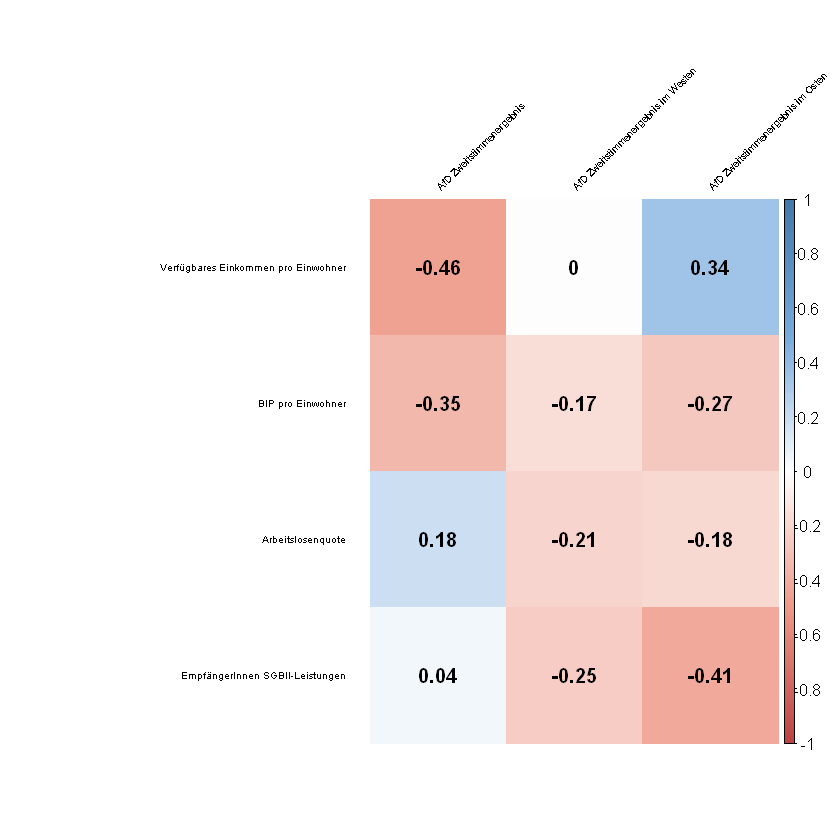

In [75]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(Zusammengefügt_Cor_Soceco_AfD, method = "color", col = col(200), shade.col = NA, tl.col = "black", tl.srt = 45,
         addCoef.col = "black", pch.cex = 1.5, tl.cex = 0.5, type = "full", tl.offset = 1, mar=c(0,0,0,0),, tl.pos = "lt",
         title = "")

png('Correlogramm_Soceco_Afd_Ergebnisse.png', pointsize = 15, width = 1500, height = 800)
corrplot(Zusammengefügt_Cor_Soceco_AfD, method = "color", col = col(200), shade.col = NA, tl.col = "black", tl.srt = 45,
         addCoef.col = "black", pch.cex = .9, tl.cex = 0.85, type = "full", tl.offset = 1, mar=c(0,0,0,0),, tl.pos = "lt",
         title = "")
dev.off()


<br>

### Scatterplots- Gesamt

In [76]:
SP_Soceco_AfD_Gesamt <- cbind(Soceco_Gesamt, AfD_Ergebnis_Prozent_Gesamt$AFD_Prozent)

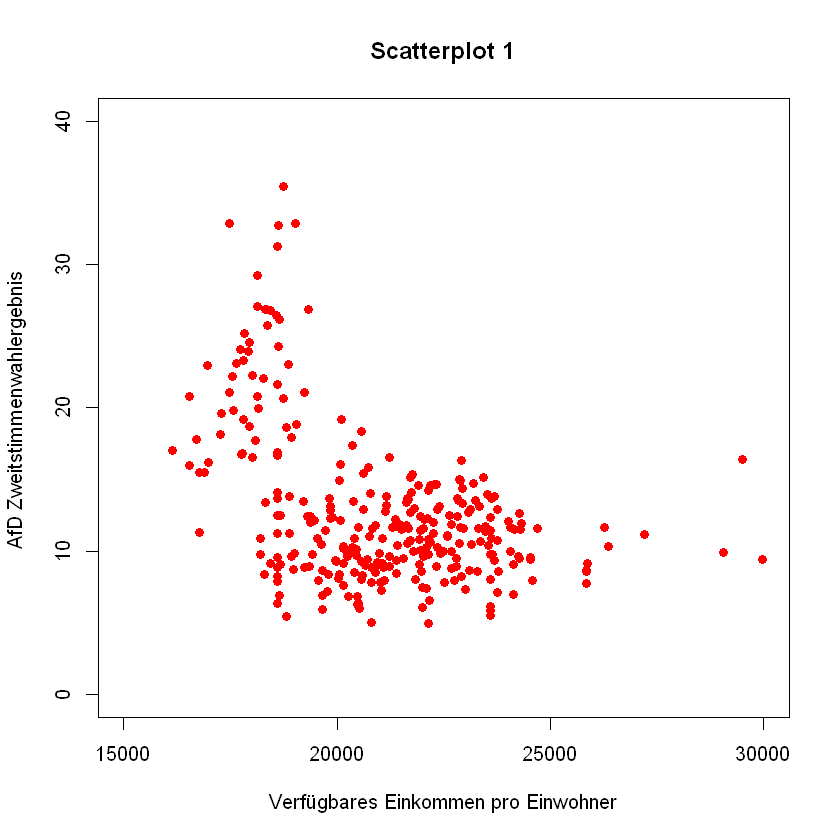

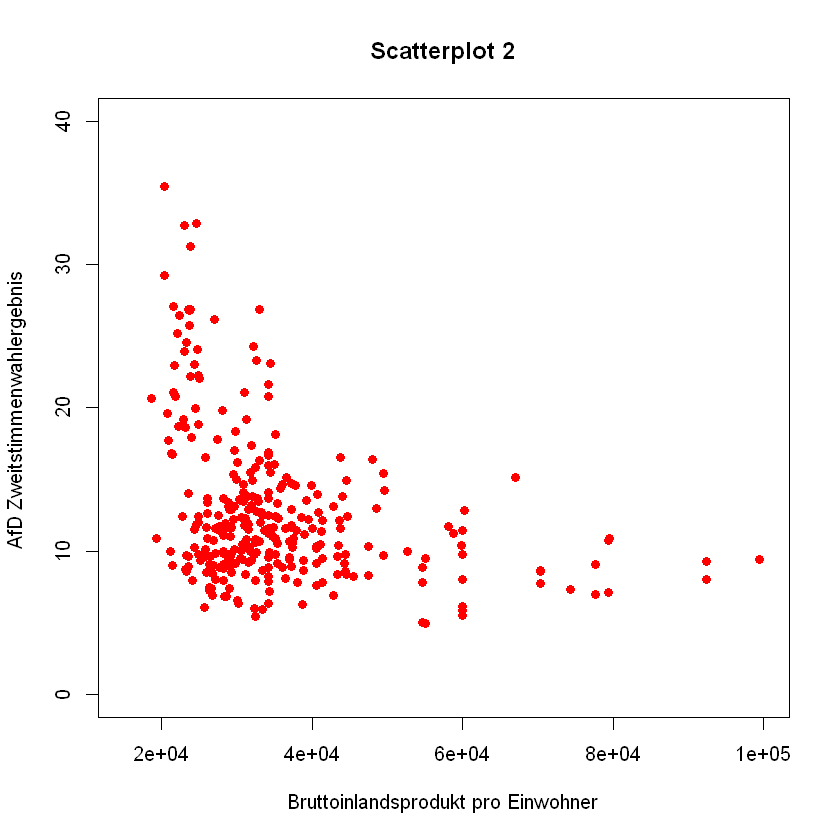

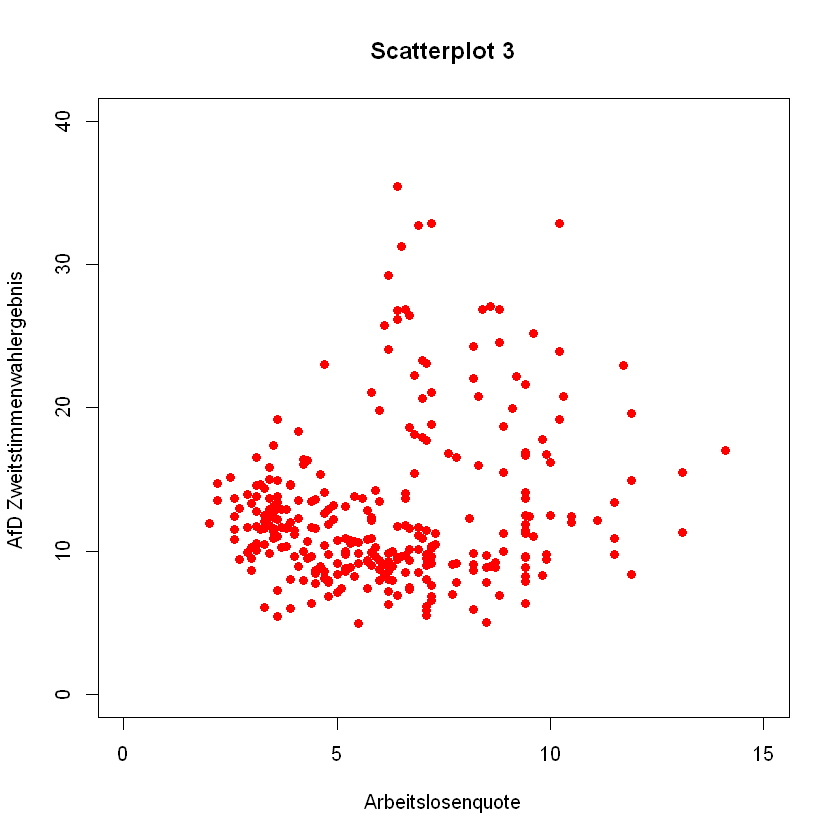

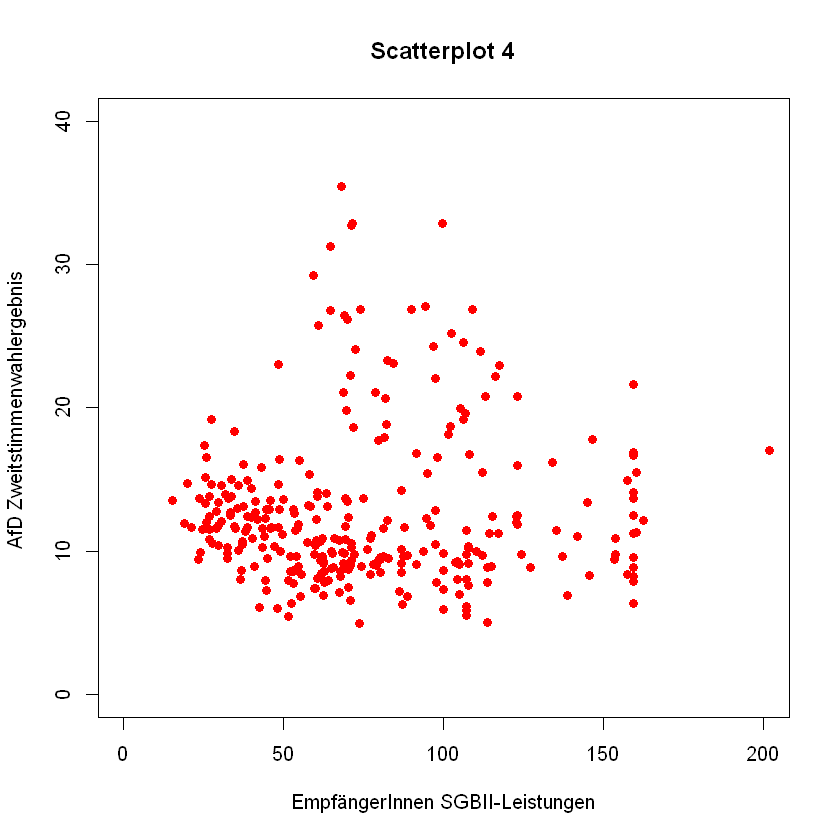

In [77]:
plot(SP_Soceco_AfD_Gesamt[,c(1,5)], main="Scatterplot 1",
   xlab="Verfügbares Einkommen pro Einwohner", ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="red",
    xlim=c(15000,30000),ylim=c(0, 40))


plot(SP_Soceco_AfD_Gesamt[,c(2,5)], main="Scatterplot 2",
   xlab="Bruttoinlandsprodukt pro Einwohner" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="red",
    xlim=c(15000,100000),ylim=c(0, 40))

plot(SP_Soceco_AfD_Gesamt[,c(3,5)], main="Scatterplot 3",
   xlab="Arbeitslosenquote" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="red",
    xlim=c(0,15),ylim=c(0, 40))

plot(SP_Soceco_AfD_Gesamt[,c(4,5)], main="Scatterplot 4",
   xlab="EmpfängerInnen SGBII-Leistungen" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="red",
    xlim=c(0,200),ylim=c(0, 40))

<br>

### Scatterplots- West: 

In [78]:
SP_Soceco_AfD_West <- cbind(Soceco_West, AfD_Ergebnis_Prozent_West$AFD_Prozent)

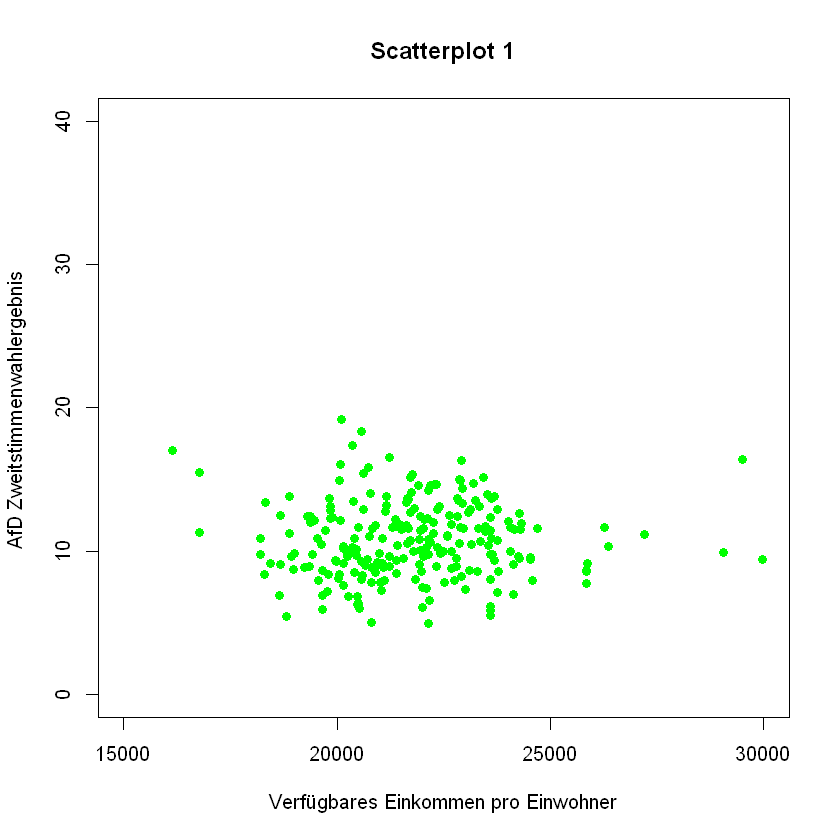

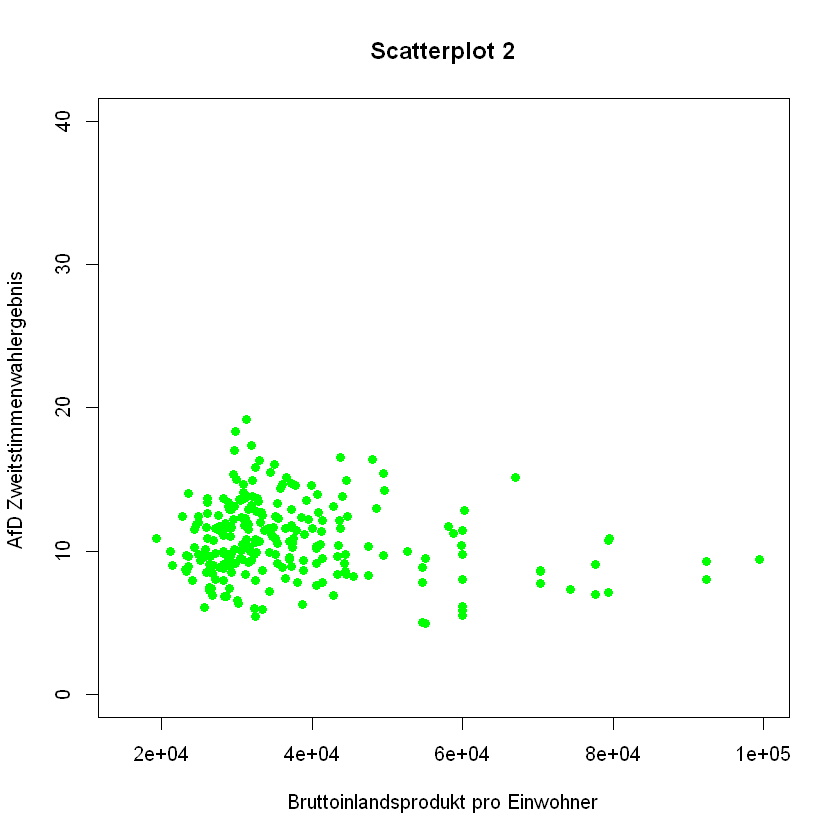

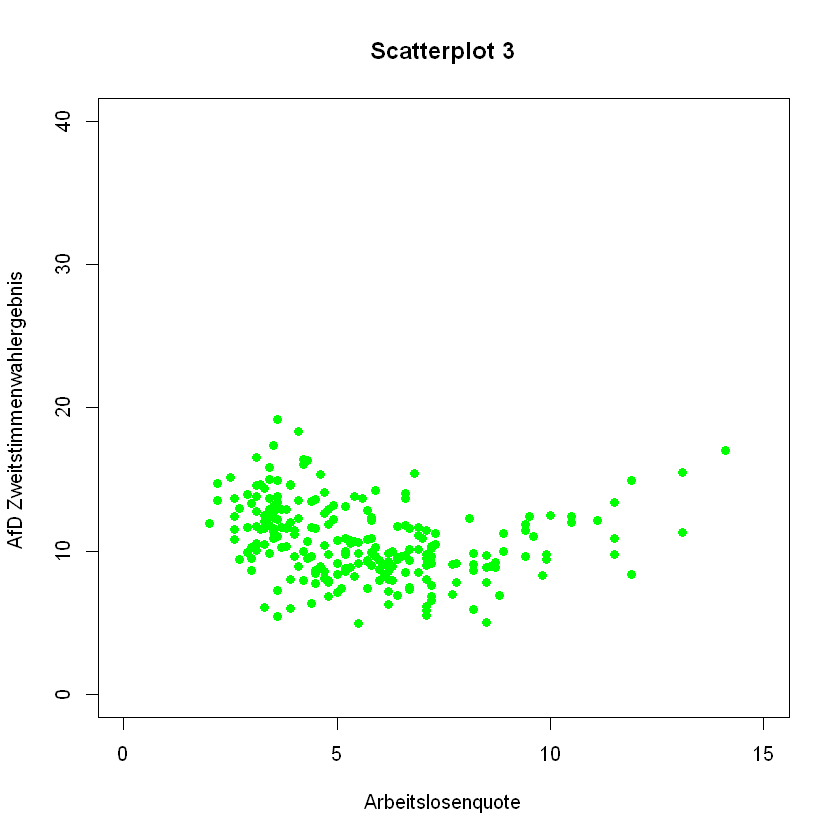

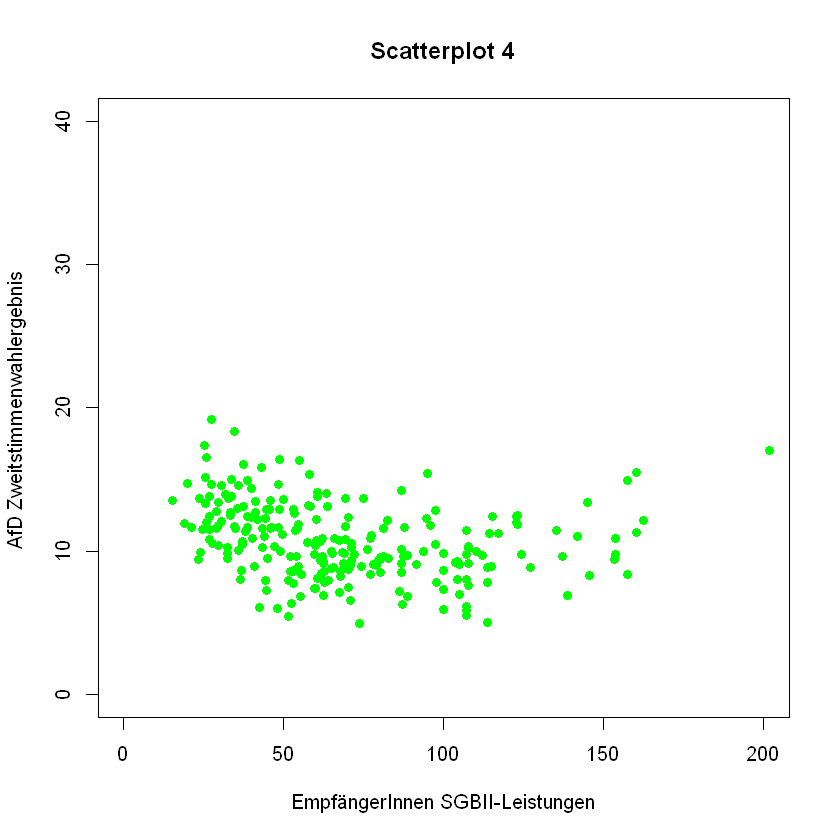

In [79]:
plot(SP_Soceco_AfD_West[,c(1,5)], main="Scatterplot 1",
   xlab="Verfügbares Einkommen pro Einwohner", ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="green",
    xlim=c(15000,30000),ylim=c(0, 40))

plot(SP_Soceco_AfD_West[,c(2,5)], main="Scatterplot 2",
   xlab="Bruttoinlandsprodukt pro Einwohner" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="green",
    xlim=c(15000,100000),ylim=c(0, 40))

plot(SP_Soceco_AfD_West[,c(3,5)], main="Scatterplot 3",
   xlab="Arbeitslosenquote" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="green",
    xlim=c(0,15),ylim=c(0, 40))

plot(SP_Soceco_AfD_West[,c(4,5)], main="Scatterplot 4",
   xlab="EmpfängerInnen SGBII-Leistungen" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="green",
    xlim=c(0,200),ylim=c(0, 40))

<br>

### Scatterplots- Ost: 

In [80]:
SP_Soceco_AfD_Ost <- cbind(Soceco_Ost, AfD_Ergebnis_Prozent_Ost$AFD_Prozent)

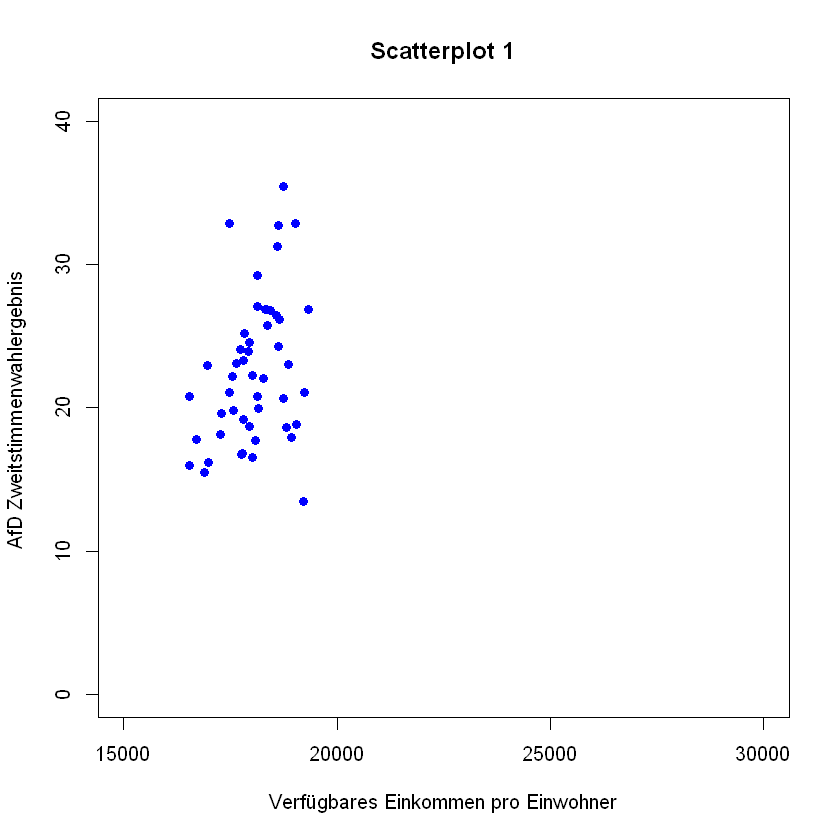

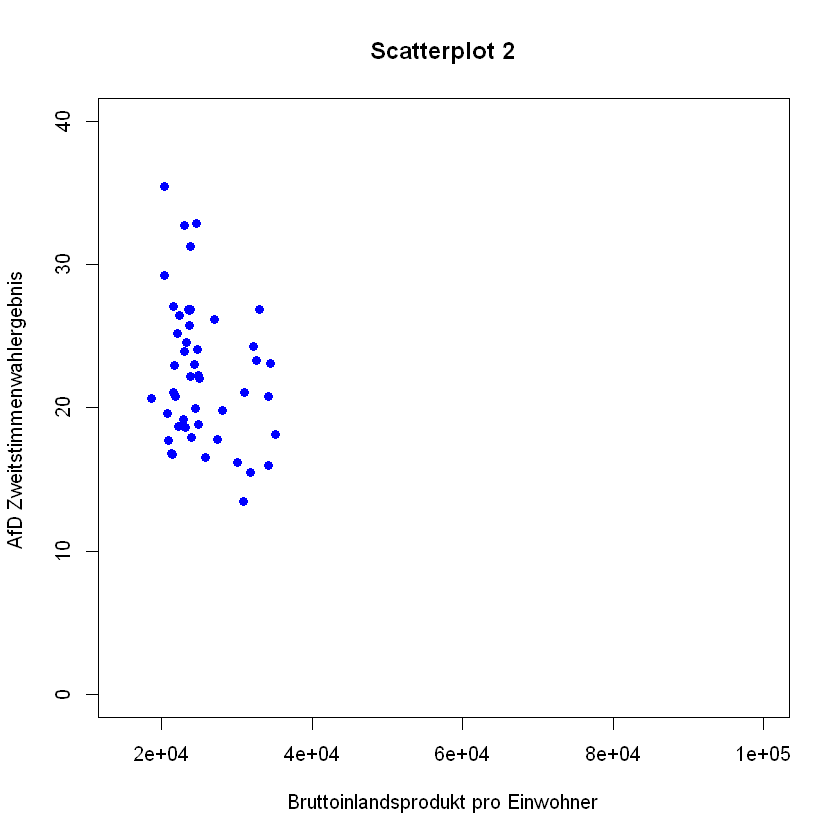

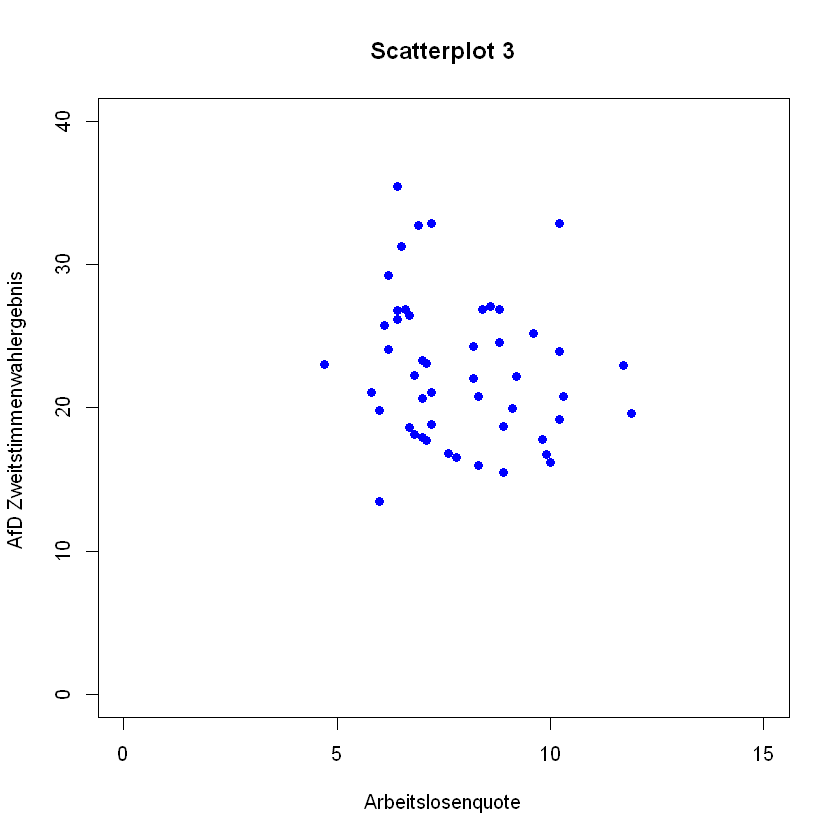

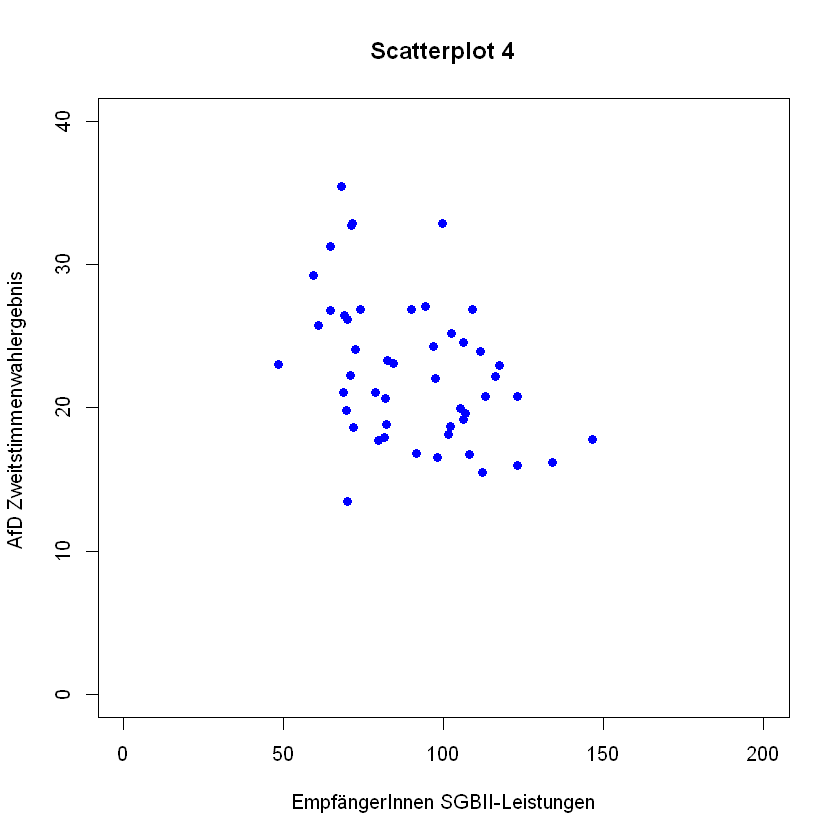

In [81]:
plot(SP_Soceco_AfD_Ost[,c(1,5)], main="Scatterplot 1",
   xlab="Verfügbares Einkommen pro Einwohner", ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="blue",
   xlim=c(15000,30000),ylim=c(0, 40))

plot(SP_Soceco_AfD_Ost[,c(2,5)], main="Scatterplot 2",
   xlab="Bruttoinlandsprodukt pro Einwohner" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="blue",,
    xlim=c(15000,100000),ylim=c(0, 40))

plot(SP_Soceco_AfD_Ost[,c(3,5)], main="Scatterplot 3",
   xlab="Arbeitslosenquote" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="blue",
    xlim=c(0,15),ylim=c(0, 40))

plot(SP_Soceco_AfD_Ost[,c(4,5)], main="Scatterplot 4",
   xlab="EmpfängerInnen SGBII-Leistungen" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="blue",
    xlim=c(0,200),ylim=c(0, 40))

## Sociodemo- AfD Zweitsimmenergebnis in Prozent

In [82]:
Cor_Sociodemo_AfD_Gesamt <- cor(Sociodemo_Gesamt, AfD_Ergebnis_Prozent_Gesamt, method = "pearson")
Cor_Sociodemo_AfD_West <- cor(Sociodemo_West, AfD_Ergebnis_Prozent_West, method = "pearson")
Cor_Sociodemo_AfD_Ost <- cor(Sociodemo_Ost, AfD_Ergebnis_Prozent_Ost, method = "pearson")
Zusammengefügt_Cor_Sociodemo_AfD <- cbind(Cor_Sociodemo_AfD_Gesamt, Cor_Sociodemo_AfD_West, Cor_Sociodemo_AfD_Ost)

colnames(Zusammengefügt_Cor_Sociodemo_AfD) <- c("AfD Zweitstimmenergebnis", "AfD Zweitstimmenergebnis im Westen", 
"AfD Zweitstimmenergebnis im Osten")
rownames(Zusammengefügt_Cor_Sociodemo_AfD) <- c("Bevölkerung mit Migrationshintergrund")

round(Zusammengefügt_Cor_Sociodemo_AfD, digits = 2)

,AfD Zweitstimmenergebnis,AfD Zweitstimmenergebnis im Westen,AfD Zweitstimmenergebnis im Osten
Bevölkerung mit Migrationshintergrund,-0.59,-0.04,-0.41


In [83]:
SP_Sociodemo_AfD_Gesamt <- cbind(Sociodemo_Gesamt, AfD_Ergebnis_Prozent_Gesamt)

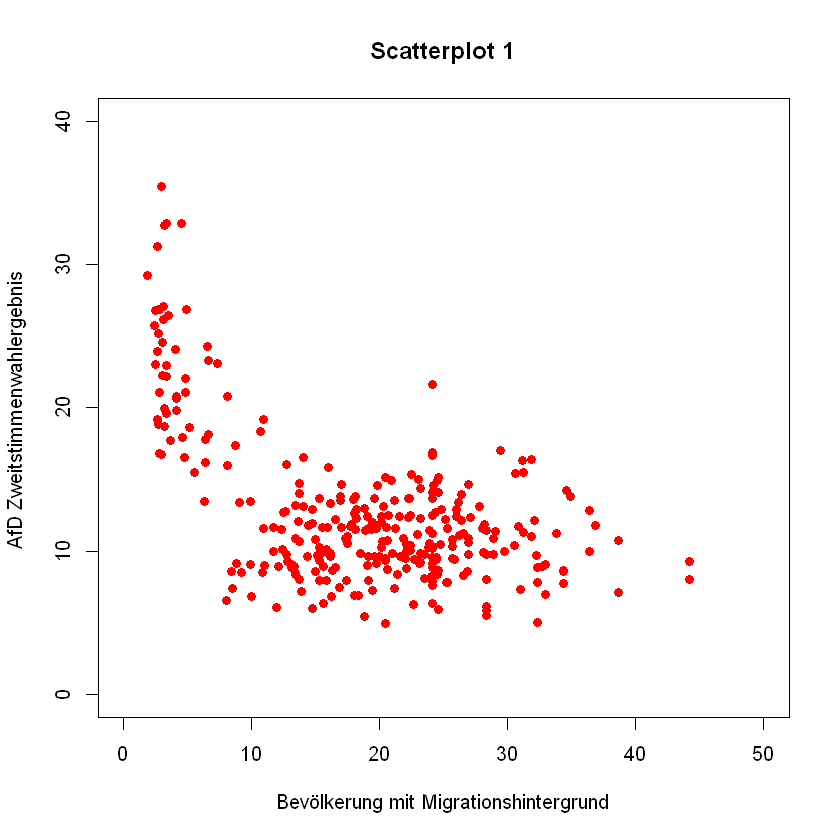

In [84]:
plot(SP_Sociodemo_AfD_Gesamt, main="Scatterplot 1",
   xlab="Bevölkerung mit Migrationshintergrund" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="red",
    xlim=c(0,50),ylim=c(0, 40))

In [85]:
SP_Sociodemo_AfD_West <- cbind(Sociodemo_West, AfD_Ergebnis_Prozent_West)

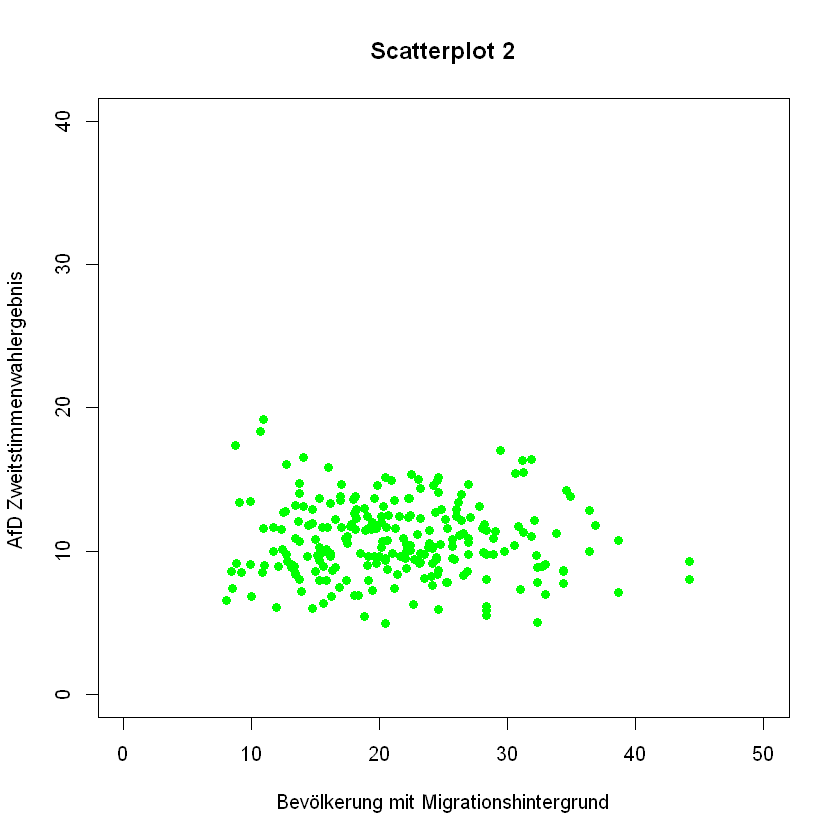

In [86]:
plot(SP_Sociodemo_AfD_West, main="Scatterplot 2",
   xlab="Bevölkerung mit Migrationshintergrund" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="green",
    xlim=c(0,50),ylim=c(0, 40))

In [87]:
SP_Sociodemo_AfD_Ost <- cbind(Sociodemo_Ost, AfD_Ergebnis_Prozent_Ost)

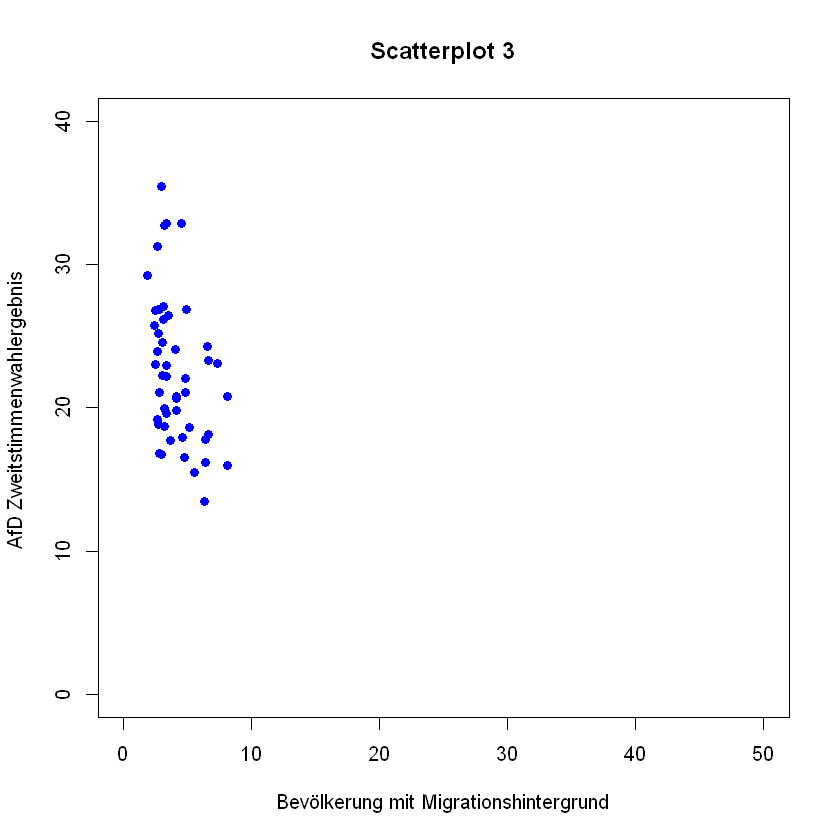

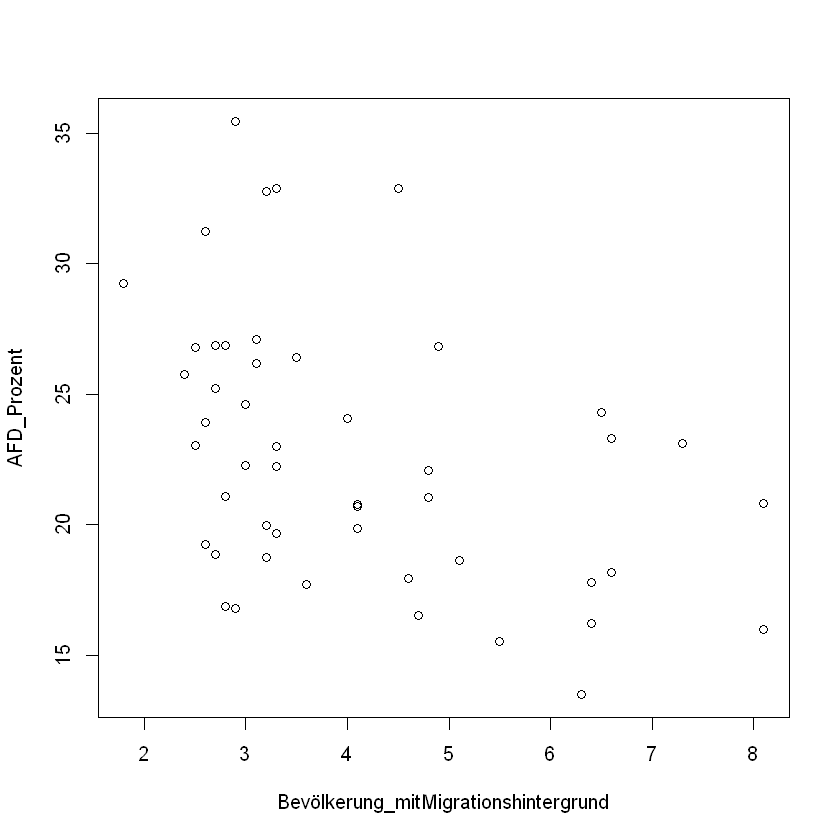

In [88]:
plot(SP_Sociodemo_AfD_Ost, main="Scatterplot 3",
   xlab="Bevölkerung mit Migrationshintergrund" , ylab="AfD Zweitstimmenwahlergebnis ", pch=19, col="blue",
    xlim=c(0,50),ylim=c(0, 40))

plot(SP_Sociodemo_AfD_Ost)

## Lineare Regression?

`geom_smooth()` using formula 'y ~ x'


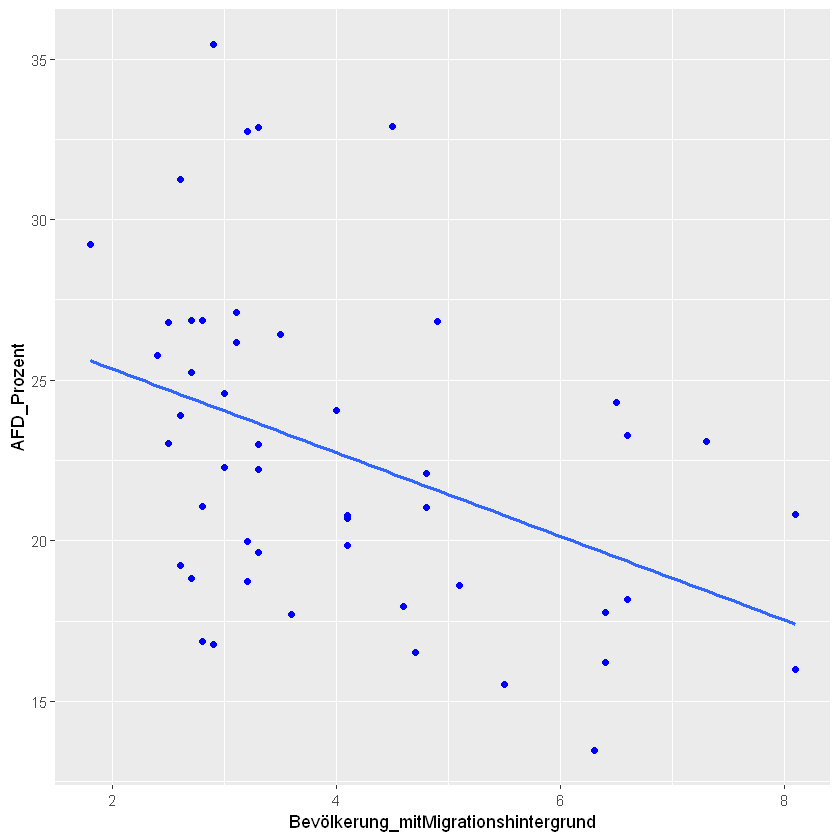

In [89]:
ggplot(data = SP_Sociodemo_AfD_Ost, aes(x = Bevölkerung_mitMigrationshintergrund, y = AFD_Prozent)) + 
  geom_point(colour = "blue") +
  geom_smooth(method = "lm", se = FALSE)



## Korrelation zwischen Ost/West und AfD Wahlergebnis

##### point-biserial correlation coefficient:

In [98]:
OstWest_AfD_Ergebnis <- Wahlergebnisse[,c(21,24)]

In [99]:
cor(OstWest_AfD_Ergebnis, method = "pearson")

,AFD_Prozent,Dummy_West_Ost
AFD_Prozent,1.0000000,0.7304384
Dummy_West_Ost,0.7304384,1.0000000


<br>
***
<br>

## Kontrollvariablen 

In [ ]:
controlV_Alle_Gesamt

In [94]:


Cor_ControlV_AfD_Gesamt <- cor(controlV_Alle_Gesamt, AfD_Ergebnis_Prozent_Gesamt, method = "pearson")
Cor_ControlV_AfD_West <- cor(controlV_Alle_West, AfD_Ergebnis_Prozent_West, method = "pearson")
Cor_ControlV_AfD_Ost <- cor(controlV_Alle_Ost, AfD_Ergebnis_Prozent_Ost, method = "pearson")
Zusammengefügt_Cor_ControlV_AfD <- cbind(Cor_ControlV_AfD_Gesamt, Cor_ControlV_AfD_West, Cor_ControlV_AfD_Ost)

colnames(Zusammengefügt_Cor_ControlV_AfD) <- c("AfD Zweitstimmenergebnis", "AfD Zweitstimmenergebnis im Westen", 
"AfD Zweitstimmenergebnis im Osten")
#rownames(Zusammengefügt_Cor_Sociodemo_AfD) <- c("Bevölkerung mit Migrationshintergrund")

round(Zusammengefügt_Cor_ControlV_AfD, digits = 2)

,AfD Zweitstimmenergebnis,AfD Zweitstimmenergebnis im Westen,AfD Zweitstimmenergebnis im Osten
Alter_unter18,-0.45,0.05,-0.10
Alter_18bis24,-0.71,-0.16,-0.46
Alter_25bis34,-0.18,-0.23,-0.41
Alter_35bis59,-0.01,0.22,-0.04
Alter_60bis74,0.65,0.18,0.49
Alter_75undÄlter,0.61,0.11,0.68
Bevölkerung_Religionszugehörigkeit_Römisch_katholisch,-0.36,0.21,-0.04
Bevölkerung_Religionszugehörigkeit_EvangelischeKirche,-0.27,-0.05,0.42
Bevölkerung_Religionszugehörigkeit_keine_OhneAngabe,0.57,-0.32,-0.33
Absolventen_allgemeiner_Fachhochschulreife,-0.28,-0.45,-0.51
